# Introduction

Le marketing, un ensemble d'activités réalisées par une entreprise, vise à favoriser l'achat ou la vente d'un produit ou service. Dans cette perspective, nous nous intéressons à une banque qui utilise le téléphone comme principal outil de communication. A travers les appels, la banque cherche à savoir si les clients potentiels sont prêts à souscrire un dépôt à terme. Une exploration approfondie de ces données nous permettra de mieux comprendre les dynamiques à l'œuvre.

Le défi commercial que nous abordons ici se présente comme un problème de classification binaire. L'objectif est de prédire si le client contacté lors de la campagne de marketing souscrira à un dépôt à terme. En d'autres termes, nous cherchons à anticiper la réponse du client - oui ou non - à l'offre de la banque, basée sur une série de caractéristiques personnelles et économiques fournies. Ces informations vont de l'âge et la profession du client, à des indicateurs plus larges tels que l'indice de confiance des consommateurs. Le succès de notre modèle dans la prédiction de ces résultats peut aider la banque à affiner ses stratégies de marketing, en identifiant les clients potentiels les plus susceptibles de répondre favorablement à leur offre de dépôt à terme.

**Source :** https://archive.ics.uci.edu/dataset/222/bank+marketing


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE
from sklearn.calibration import CalibratedClassifierCV


from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, precision_recall_fscore_support, confusion_matrix, roc_auc_score

import pickle
from scipy.stats import chi2_contingency
from math import pi

In [142]:
warnings.filterwarnings("ignore")

In [143]:
%pwd

'/content'

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importation et description des données


Notre dataset comprend 17 attributs regroupant 41 188 observations. Ainsi, nous disposons de 16 features et d'une variable cible nommée "y".


**age** : âge du client

**job** : type de travail

**marital** : statut matrimonial

**education** : niveau d'éducation le plus élevé du client

**default** : le client a-t-il un crédit par défaut

**balance** : solde annuel moyen, en euros

**housing** : le client a-t-il un prêt immobilier ?

**loan** : le client a-t-il un prêt personnel ?

**contact** : type de communication de contact

**day** : dernier jour de contact du mois

**month** : dernier mois de contact de l'année

**duration** : durée du dernier contact, en secondes

**campaign** : nombre de contacts effectués lors de cette campagne et pour ce client

**pdays** : nombre de jours écoulés depuis le dernier contact du client lors d'une campagne précédente

**previous** : nombre de contacts effectués avant cette campagne et pour ce client

**poutcome** : résultat de la précédente campagne de marketing

**y** : le client a-t-il souscrit un dépôt à terme ?

In [145]:
deposit_term_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/data/MP.csv', sep = ';', encoding = "utf-8")
deposit_term_df.head(20)

age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
9    25     services    single          high.school       no     yes   no   
10   41  blue-collar   married              unknown  unknown      no   no   
11   25     services    single          high.school       no     yes   no   
12   29  blue-collar    single          high.school       no      no  yes   
13   57    housemaid  divorced             basic.4y       no     yes   no   
14   35  blue-collar   married             basic.6y       no     yes   no   
15   54      retired   married             basic.9y  unknown     yes  yes   
16   35  blue-collar   married             basic.6y       no     yes   no   
17   46  blue-collar   married             basic.6y  unknown     yes  yes   
18   50  blue-collar   married             basic.9y       no     yes  yes   
19   39   management    single             basic.9y  unknown      no   no   

      contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   telephone   may         mon  ...         1    999         0  nonexistent   
1   telephone   may         mon  ...         1    999         0  nonexistent   
2   telephone   may         mon  ...         1    999         0  nonexistent   
3   telephone   may         mon  ...         1    999         0  nonexistent   
4   telephone   may         mon  ...         1    999         0  nonexistent   
5   telephone   may         mon  ...         1    999         0  nonexistent   
6   telephone   may         mon  ...         1    999         0  nonexistent   
7   telephone   may         mon  ...         1    999         0  nonexistent   
8   telephone   may         mon  ...         1    999         0  nonexistent   
9   telephone   may         mon  ...         1    999         0  nonexistent   
10  telephone   may         mon  ...         1    999         0  nonexistent   
11  telephone   may         mon  ...         1    999         0  nonexistent   
12  telephone   may         mon  ...         1    999         0  nonexistent   
13  telephone   may         mon  ...         1    999         0  nonexistent   
14  telephone   may         mon  ...         1    999         0  nonexistent   
15  telephone   may         mon  ...         1    999         0  nonexistent   
16  telephone   may         mon  ...         1    999         0  nonexistent   
17  telephone   may         mon  ...         1    999         0  nonexistent   
18  telephone   may         mon  ...         1    999         0  nonexistent   
19  telephone   may         mon  ...         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no  
5           1.1          93.994          -36.4      4.857       5191.0  no  
6           1.1          93.994          -36.4      4.857       5191.0  no  
7           1.1          93.994          -36.4      4.857       5191.0  no  
8           

In [146]:
deposit_term_df.shape

(41188, 21)

In [147]:
deposit_term_df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [148]:
deposit_term_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [149]:
deposit_term_df_unique = {
    col: deposit_term_df[col].unique().tolist()
    for col in deposit_term_df.select_dtypes(include='object').columns
}

deposit_term_df_unique

{'job': ['housemaid',
  'services',
  'admin.',
  'blue-collar',
  'technician',
  'retired',
  'management',
  'unemployed',
  'self-employed',
  'unknown',
  'entrepreneur',
  'student'],
 'marital': ['married', 'single', 'divorced', 'unknown'],
 'education': ['basic.4y',
  'high.school',
  'basic.6y',
  'basic.9y',
  'professional.course',
  'unknown',
  'university.degree',
  'illiterate'],
 'default': ['no', 'unknown', 'yes'],
 'housing': ['no', 'yes', 'unknown'],
 'loan': ['no', 'yes', 'unknown'],
 'contact': ['telephone', 'cellular'],
 'month': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'mar',
  'apr',
  'sep'],
 'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'],
 'poutcome': ['nonexistent', 'failure', 'success'],
 'y': ['no', 'yes']}

In [150]:
unknown_count = deposit_term_df.apply(lambda x: x[x == 'unknown'].count())

missing_rate = pd.DataFrame({
                             'count': (deposit_term_df.isna().sum() + unknown_count),
                             'rate': (deposit_term_df.isna().sum() *100 / deposit_term_df.shape[0])
                                        + (unknown_count * 100 / deposit_term_df.shape[0])
                             }).sort_values(by = 'rate', ascending = False)
missing_rate

count       rate
default          8597  20.872584
education        1731   4.202680
housing           990   2.403613
loan              990   2.403613
job               330   0.801204
marital            80   0.194231
age                 0   0.000000
poutcome            0   0.000000
nr.employed         0   0.000000
euribor3m           0   0.000000
cons.conf.idx       0   0.000000
cons.price.idx      0   0.000000
emp.var.rate        0   0.000000
duration            0   0.000000
previous            0   0.000000
pdays               0   0.000000
campaign            0   0.000000
day_of_week         0   0.000000
month               0   0.000000
contact             0   0.000000
y                   0   0.000000

In [151]:
deposit_term_df[deposit_term_df.duplicated()]

age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1266   telephone   may         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32516   cellular   may         fri  ...         4    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1266   nonexistent          1.1          93.994          -36.4      4.855   
12261  nonexistent          1.4          93.918          -42.7      4.966   
14234  nonexistent          1.4          93.918          -42.7      4.962   
16956  nonexistent          1.4          93.918          -42.7      4.962   
18465  nonexistent          1.4          93.918          -42.7      4.968   
20216  nonexistent          1.4          93.444          -36.1      4.965   
20534  nonexistent          1.4          93.444          -36.1      4.966   
25217  nonexistent         -0.1          93.200          -42.0      4.153   
28477  nonexistent         -1.8          93.075          -47.1      1.423   
32516  nonexistent         -1.8          92.893          -46.2      1.313   
36951  nonexistent         -2.9          92.469          -33.6      1.072   
38281  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1266        5191.0   no  
12261       5228.1   no  
14234       5228.1   no  
16956       5228.1   no  
18465       5228.1   no  
20216       5228.1   no  
20534       5228.1   no  
25217       5195.8   no  
28477       5099.1   no  
32516       5099.1   no  
36951       5076.2  yes  
38281       5017.5   no  

[12 rows x 21 columns]

In [152]:
deposit_term_df.drop_duplicates(inplace=True)

In [153]:
deposit_term_df.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [154]:
education_mapping = {
    'basic.4y': 'basic',
    'basic.6y': 'basic',
    'basic.9y': 'basic',
    'high.school': 'high school',
    'professional.course': 'professional course',
    'university.degree': 'university degree',
}

deposit_term_df.education = deposit_term_df.education.map(education_mapping)
deposit_term_df.education

0                      basic
1                high school
2                high school
3                      basic
4                high school
                ...         
41183    professional course
41184    professional course
41185      university degree
41186    professional course
41187    professional course
Name: education, Length: 41176, dtype: object

In [155]:
deposit_term_df.drop('duration', axis=1, inplace=True)

## Analyse exploratoire et descriptive des données

## Etude générale et indépendante des variables explicatives

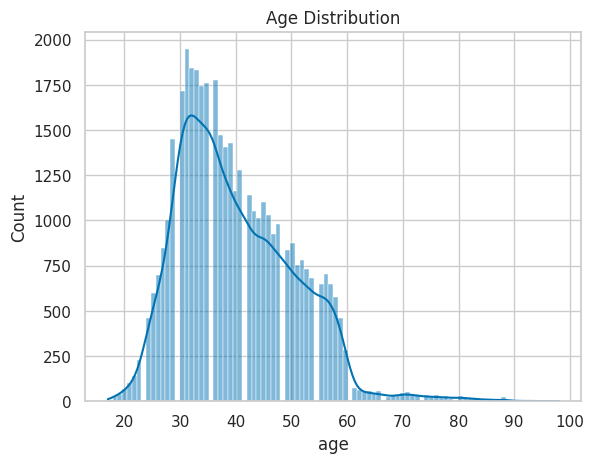

In [156]:
sns.histplot(data=deposit_term_df, x="age", kde=True)
plt.title("Age Distribution")
plt.show()

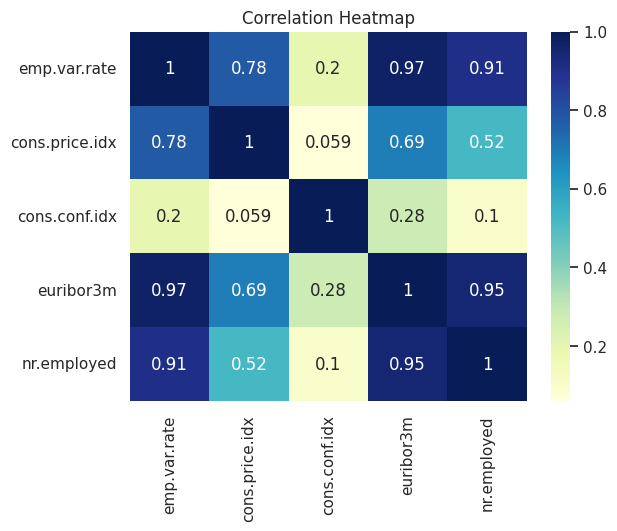

In [157]:
correlation_variables = deposit_term_df[["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
correlation = correlation_variables.corr()
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

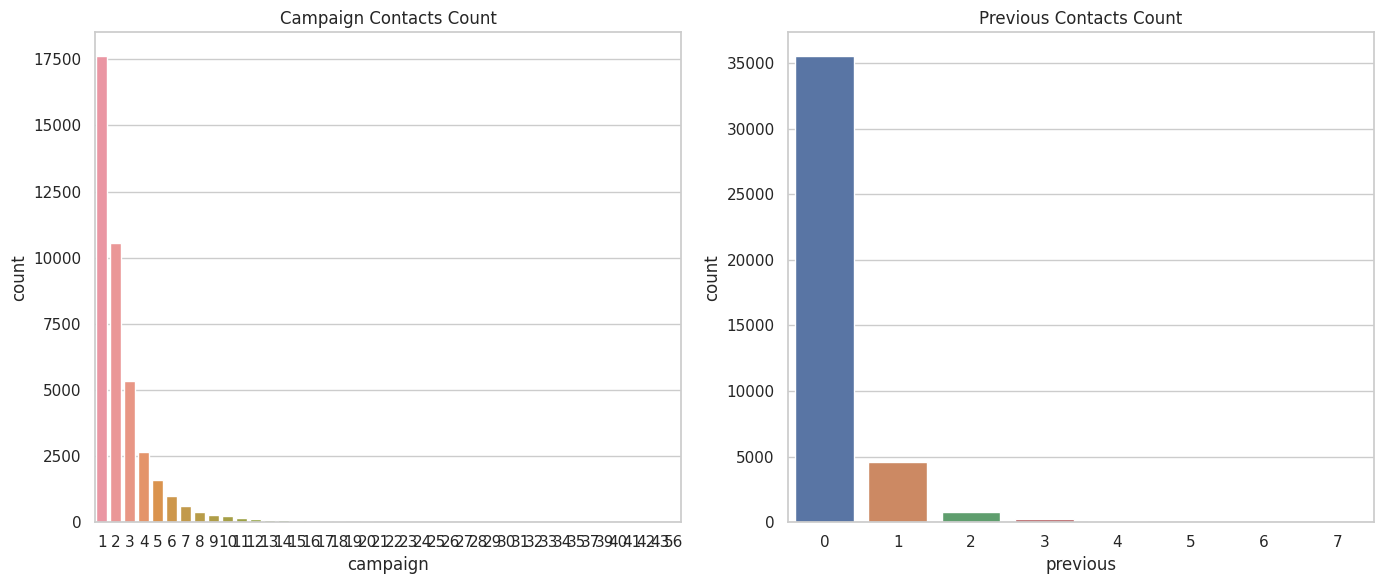

In [158]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=deposit_term_df, x="campaign", ax=ax[0])
ax[0].set_title("Campaign Contacts Count")

sns.countplot(data=deposit_term_df, x="previous", ax=ax[1])
ax[1].set_title("Previous Contacts Count")

plt.tight_layout()
plt.show()

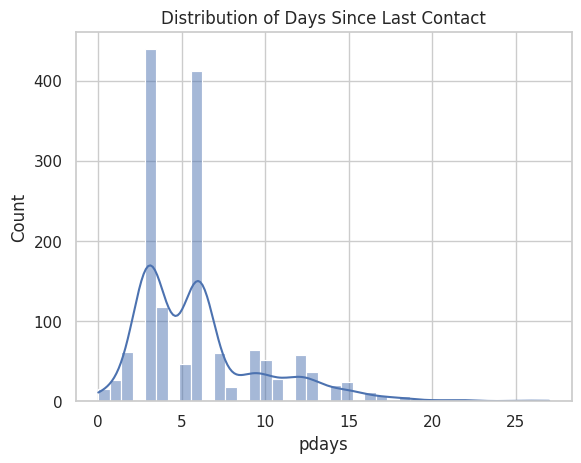

In [159]:
sns.histplot(data=deposit_term_df[deposit_term_df["pdays"]!=999], x="pdays", kde=True)
plt.title("Distribution of Days Since Last Contact")
plt.show()


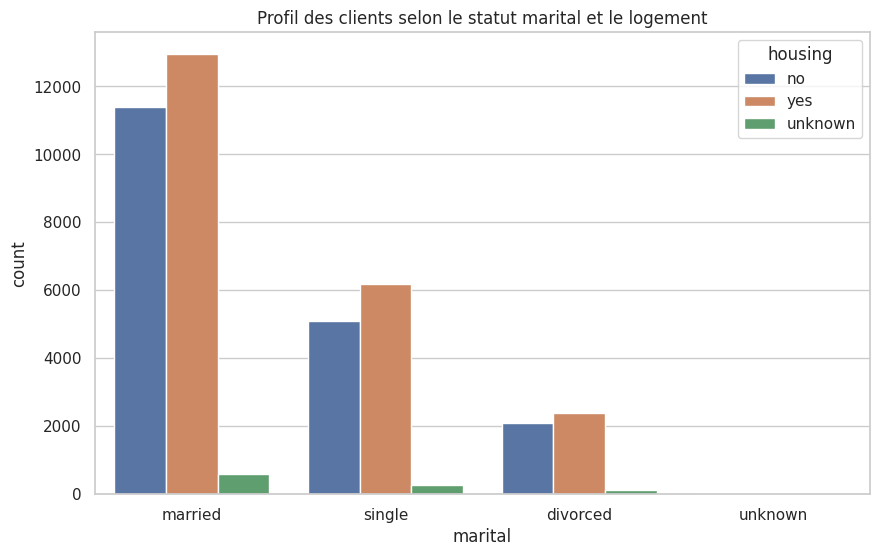

In [160]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital', hue='housing', data=deposit_term_df)
plt.title('Profil des clients selon le statut marital et le logement')
plt.show()

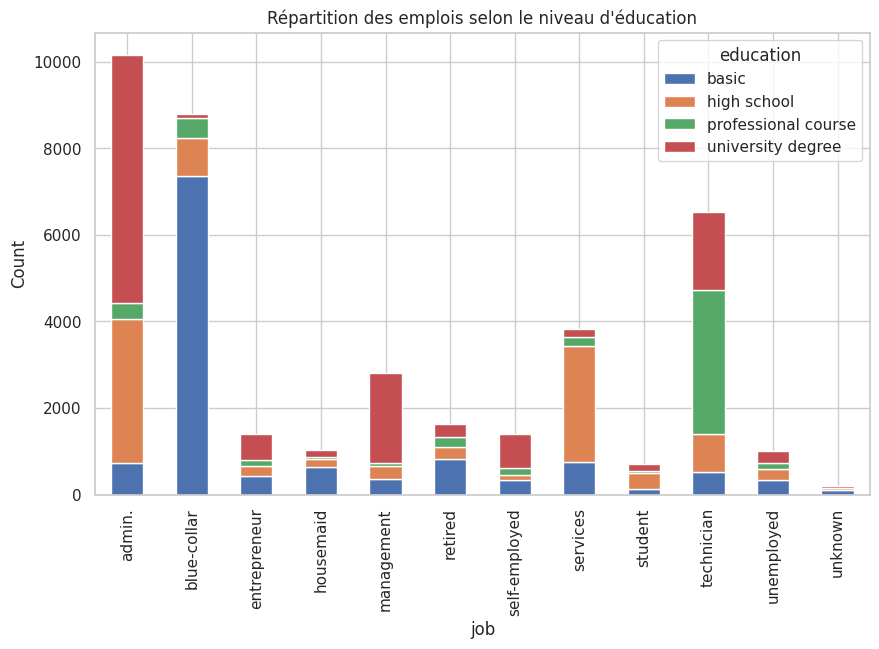

In [161]:
education_job = pd.crosstab(deposit_term_df['job'], deposit_term_df['education'])
education_job.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Répartition des emplois selon le niveau d'éducation")
plt.ylabel('Count')
plt.show()

## Etude générale entre les variables explicatives et la variable cible

In [162]:
df_grouped = deposit_term_df.groupby('y')

In [163]:
def percent(col, groupby= 'yes'):

  count = df_grouped.get_group(groupby)[col].value_counts()
  total_count = deposit_term_df[col].value_counts()[count.index]

  perc = (count/total_count)*100
  return perc

def barplot_init(array):

  sns.set_style('darkgrid')
  sns.set_palette('RdBu')

  sns.barplot(x= array, y= array.index, ax= None)
  plt.yticks(np.arange(len(array)))
  plt.xticks(range(0, round(max(array)) + 10, 5))

  for index, value in enumerate(array.values):
    plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = 'blue')
  return plt


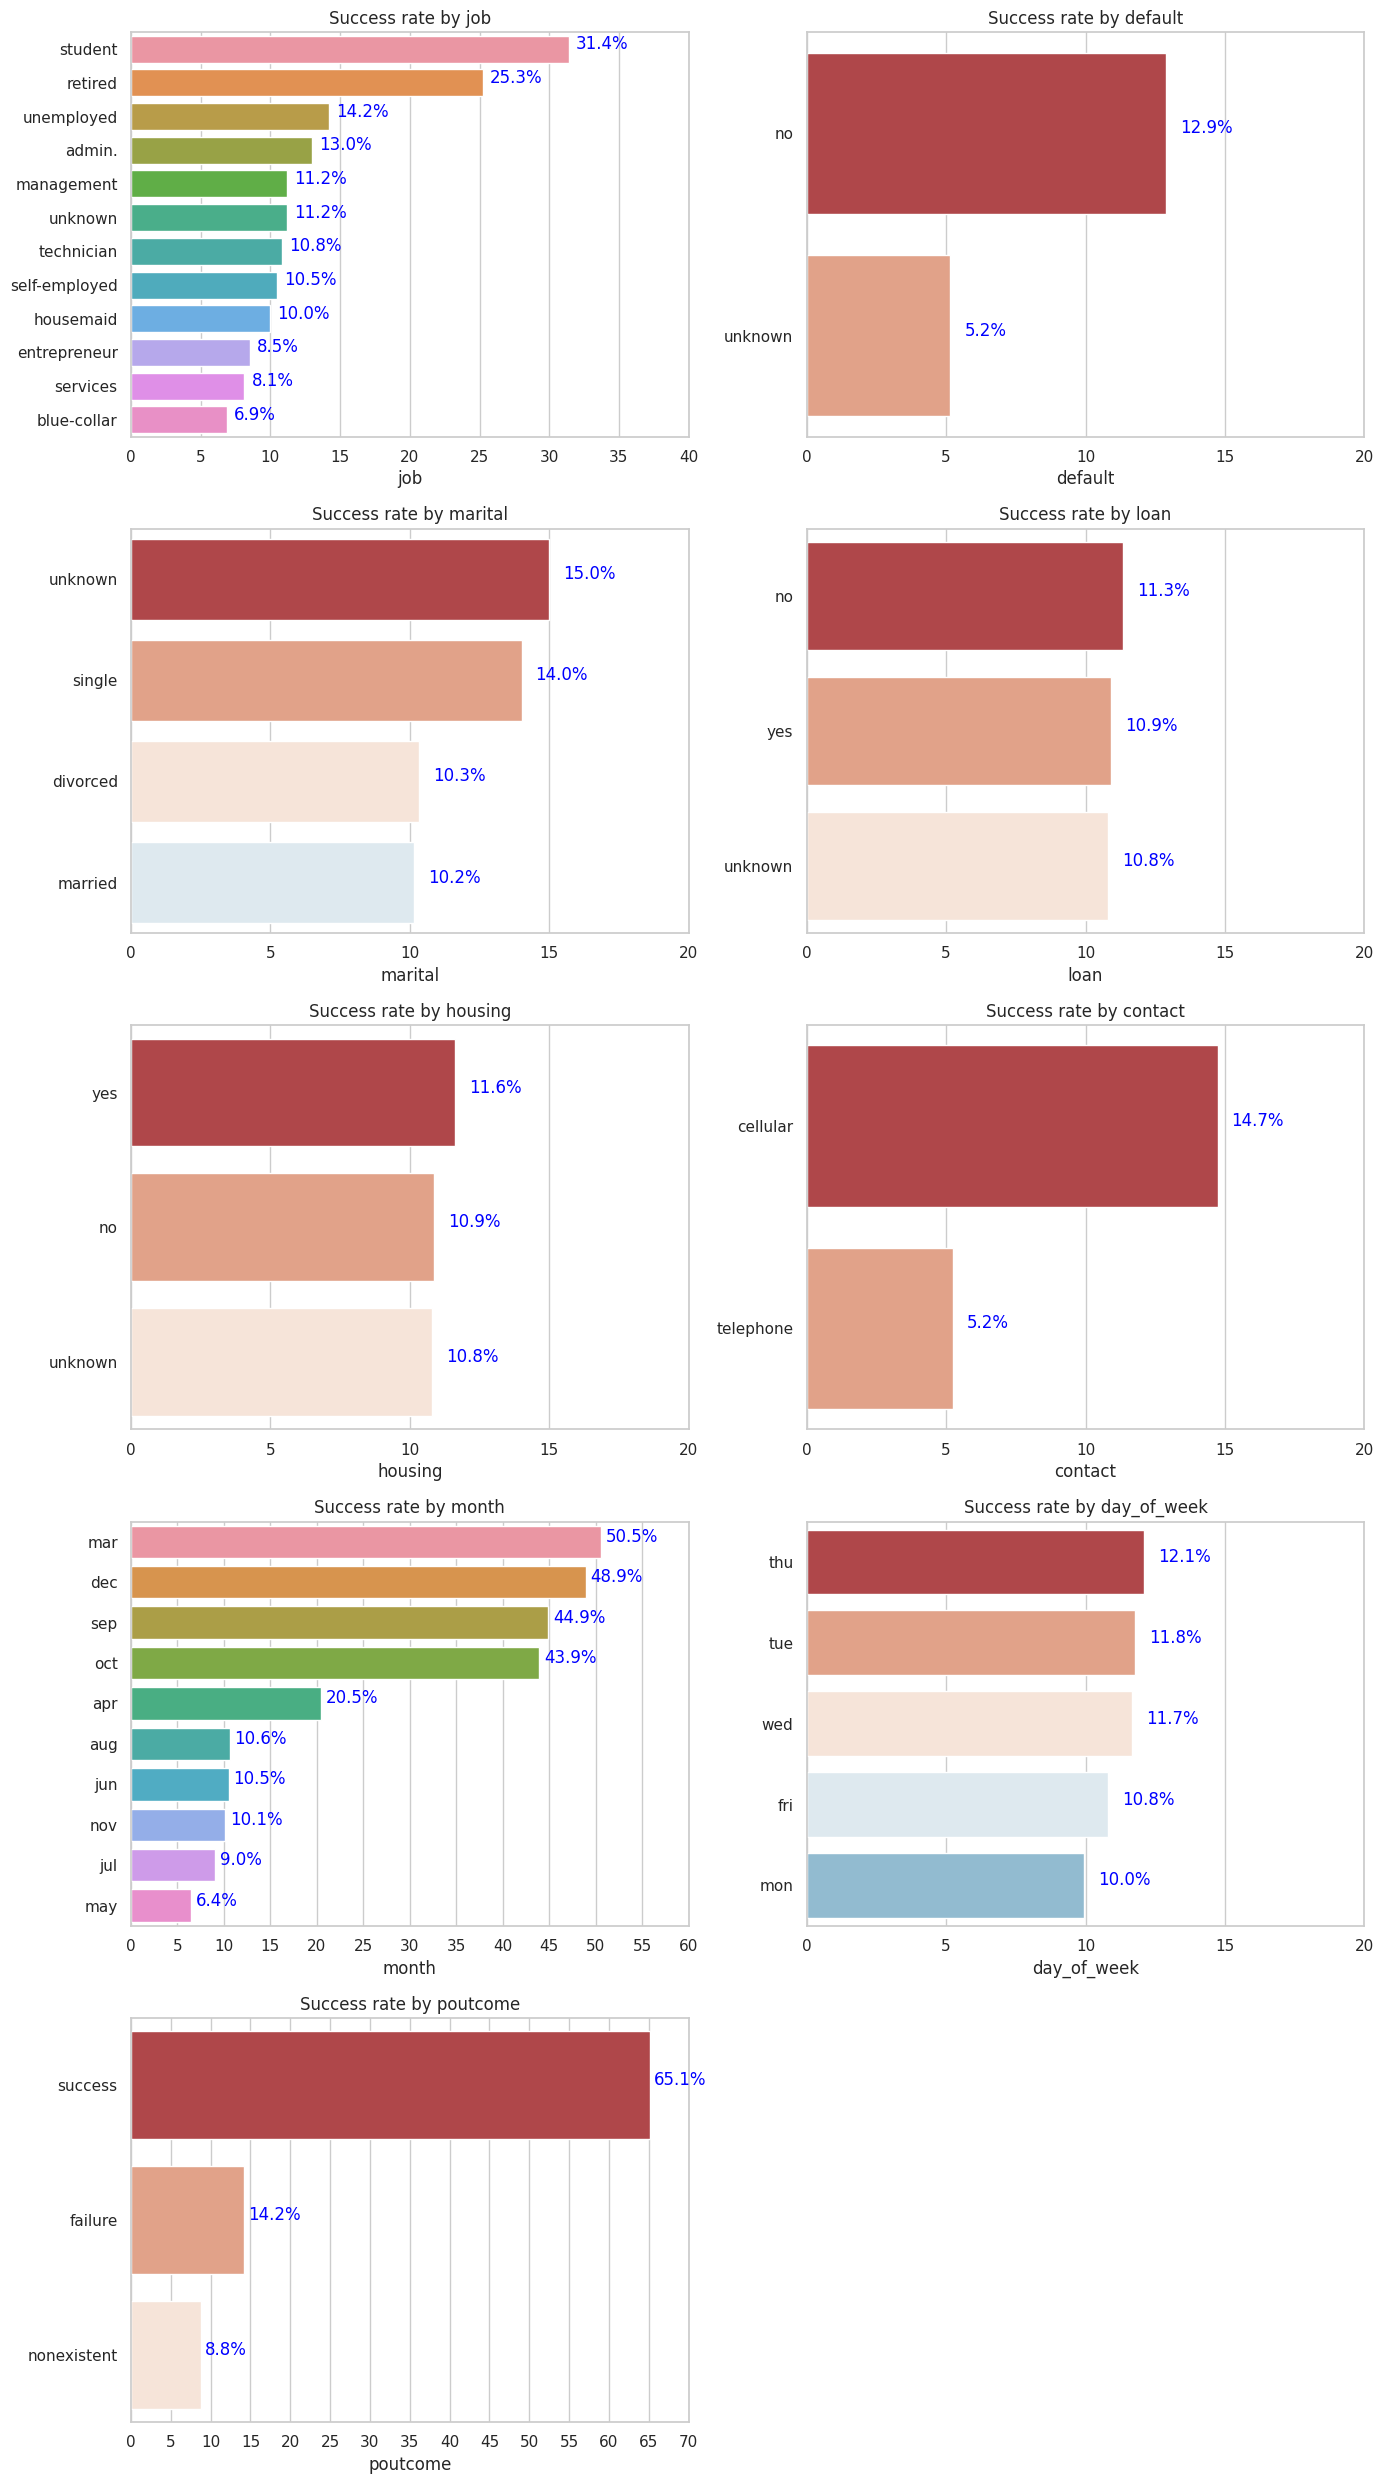

In [164]:
cols = ['job', 'default', 'marital', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']

n_rows = int(np.ceil(len(cols) / 2))


fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows))
axes = axes.ravel()

for i, col in enumerate(cols):
    rate = percent(col)
    plt.sca(axes[i])
    plt.title('Success rate by {}'.format(col))
    barplot_init(rate.sort_values(ascending=False))

if len(cols) % 2:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

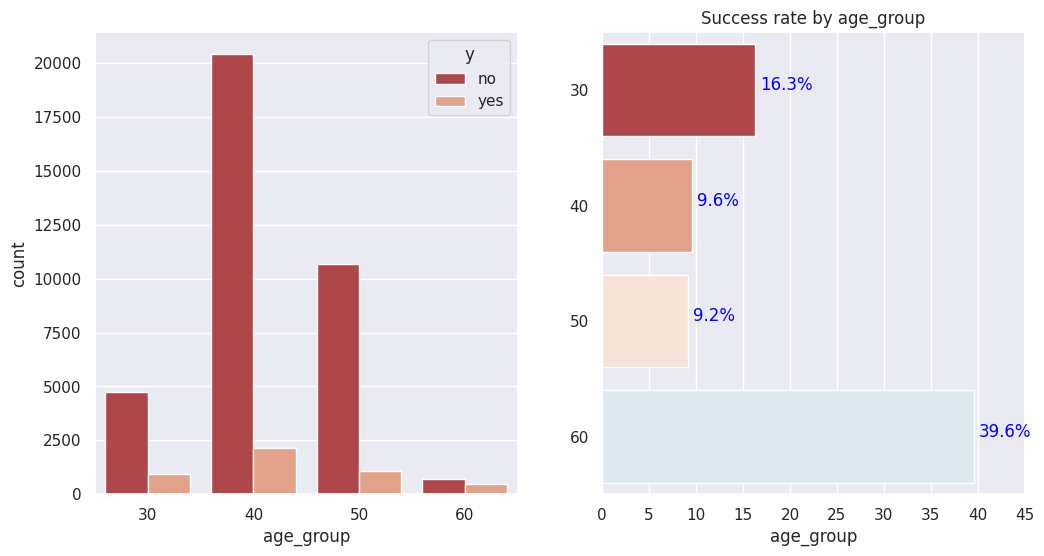

In [165]:
age = pd.DataFrame(data=deposit_term_df, copy=True)
age_grouped = age.groupby('y')

tmp = [age]

for column in tmp:
  column.loc[column["age"] < 30,  'age_group'] = '30'
  column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = '40'
  column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = '50'
  column.loc[column["age"] >= 60, 'age_group'] = '60'

age = age.sort_values(by='age_group',ascending=True)
count = age_grouped.get_group('yes')['age_group'].value_counts()
total_count = age['age_group'].value_counts()[count.index]
perc = (count/total_count)*100
perc = perc.sort_index(ascending=True)

fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(x='age_group', data=age, hue='y', ax= ax[0])
sns.set_style('darkgrid')
sns.set_palette('RdBu')

plt.title('Success rate by age_group')
sns.barplot(x= perc, y= perc.index, ax= ax[1])
plt.yticks(np.arange(len(perc)))
plt.xticks(range(0, round(max(perc)) + 10, 5))

for index, value in enumerate(perc.values):
  plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = 'blue')

plt.show()

Ces graphiques nous indiquent que les client de moins de 30 ans ou de plus de 60 ans ont le plus de chances d'accepter l'offre proposée.

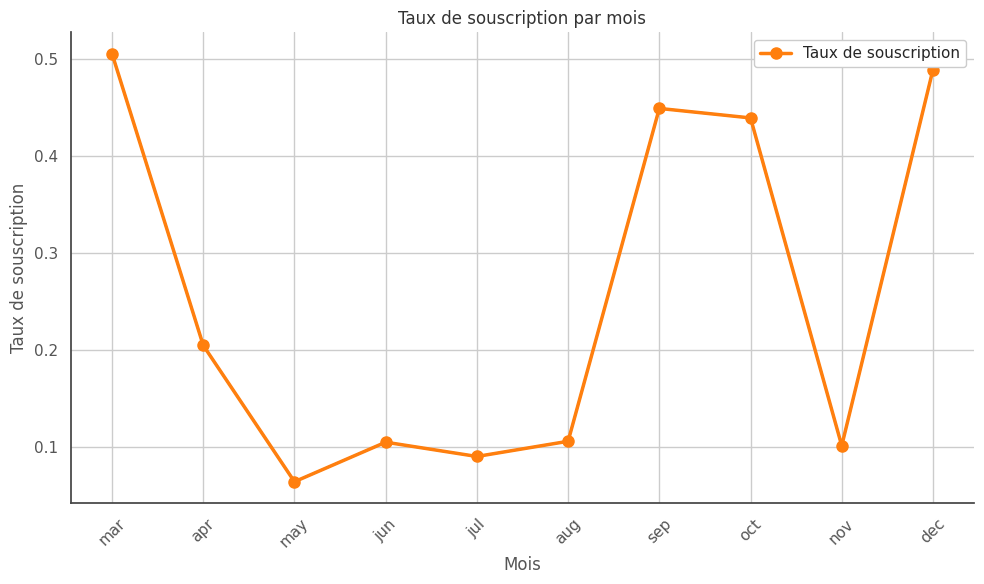

In [166]:
subscription_by_month = deposit_term_df[deposit_term_df['y'] == 'yes'].groupby('month').size()
total_clients_by_month = deposit_term_df.groupby('month').size()
subscription_rate_by_month = subscription_by_month / total_clients_by_month

subscription_rate_df = pd.DataFrame({'Month': subscription_rate_by_month.index, 'Subscription Rate': subscription_rate_by_month.values})

subscription_rate_df['Month'] = pd.Categorical(subscription_rate_df['Month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
subscription_rate_df.sort_values('Month', inplace=True)

sns.set_style("whitegrid")
sns.set_palette("colorblind")

plt.figure(figsize=(10, 6))
sns.lineplot(data=subscription_rate_df, x='Month', y='Subscription Rate', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Taux de souscription')
plt.title('Taux de souscription par mois')
plt.tight_layout()

line_color = '#ff7f0e'
marker_color = '#1f77b4'
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#444444')
plt.gca().spines['left'].set_color('#444444')
plt.gca().tick_params(axis='x', colors='#555555')
plt.gca().tick_params(axis='y', colors='#555555')
plt.gca().yaxis.label.set_color('#555555')
plt.gca().xaxis.label.set_color('#555555')
plt.gca().title.set_color('#333333')
plt.gca().set_facecolor('#ffffff')
plt.plot(subscription_rate_df['Month'], subscription_rate_df['Subscription Rate'], marker='o', color=line_color, linewidth=2.5, markersize=8, label='Taux de souscription')
plt.legend(facecolor='white', framealpha=1)
plt.show()

Le mois de mars présente le taux de souscription le plus haut tandis que le moi de mai en présente le plus bas. Cette tendance peut être justifiée par des facteurs saisonniers ou par des événements spécifiques qui ont influencé le comportement des clients.

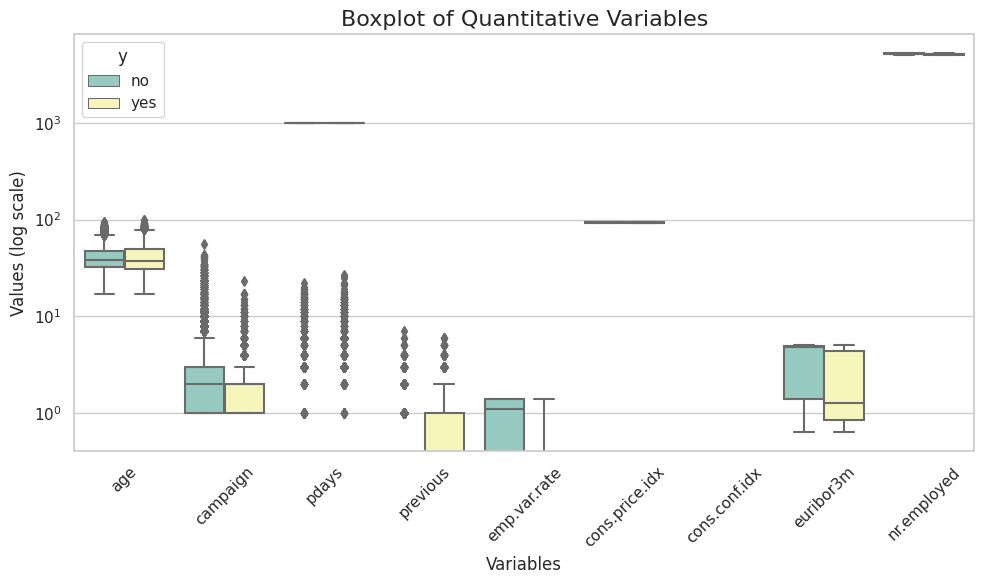

In [167]:
quantitative_vars = ['age', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']

df_melted = pd.melt(deposit_term_df, id_vars='y', value_vars=quantitative_vars)

plt.figure(figsize=(10, 6))

sns.boxplot(x='variable', y='value', hue='y', data=df_melted, palette="Set3")

plt.yscale('log')
plt.title('Boxplot of Quantitative Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values (log scale)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Ce boxplot nous permet de mettre en évidence qu'a l'exception des variables à connotation économique et sociale, ce jeu de données contient de nombreuses données aberrantes ("outliers").

### Détection d'outliers à l'aide de l'écart interquartile

In [168]:
df_num = deposit_term_df.select_dtypes(exclude=['object', 'category'])

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

is_outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

outliers = pd.DataFrame({ 'outliers_rate':
                         is_outliers.sum(axis=0) / len(df_num) * 100 })
outliers.sort_values(by='outliers_rate', ascending=False)

outliers_rate
previous            13.660870
campaign             5.843210
pdays                3.679328
age                  1.136584
cons.conf.idx        1.083155
emp.var.rate         0.000000
cons.price.idx       0.000000
euribor3m            0.000000
nr.employed          0.000000

Nous retrouvons des proportions faibles en terme de détection d'outliers pour les variables quantitatives. Cela corrobore davantage la détection des outliers par rapport à la méthode "visuelle" à l'aide d'une boite à moustaches.

## Sélection de features à partir du test d'indépendance du Khi-2

Le test de KHI-2 est un test statistique qui permet de mettre en évidence la dépendance entre deux variables qualitatives. Dans notre cas d'usage, nous allons élaborer un ensemble de tests de Khi-2 entre chaque variable qualitative avec notre variable cible. Cela nous permettra de capturer les *p-values* faibles, découlant ainsi de l'importance des features dans la sélection des features. Cette approche est purement naive mais donne un premier apriori sur les features à sélectionner en nous basant sur les variables les plus dépendantes au sens statistique avec la variable cible à expliquer.

In [169]:
index_list = list(deposit_term_df.dtypes.index)

khi_deux = pd.DataFrame(index=index_list[:-1],columns=['p-value'], dtype='float64')

for col in index_list[:-1]:
  contingency_table = pd.crosstab(deposit_term_df['y'], deposit_term_df[col])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  khi_deux.at[col, 'p-value'] = p

khi_deux_ordered = khi_deux.sort_values(by=['p-value'],ascending= True)
khi_deux_ordered

p-value
nr.employed      0.000000e+00
cons.conf.idx    0.000000e+00
cons.price.idx   0.000000e+00
emp.var.rate     0.000000e+00
poutcome         0.000000e+00
previous         0.000000e+00
pdays            0.000000e+00
euribor3m        0.000000e+00
month            0.000000e+00
age             1.803604e-295
job             3.268412e-199
contact         1.718741e-189
default          5.217541e-89
education        4.412301e-34
marital          1.778423e-26
campaign         3.988243e-26
day_of_week      3.085755e-05
housing          5.663793e-02
loan             5.771532e-01

On tire alors de ce qui précède les potentielles features à savoir :

**nr.employed**

**cons.conf.idx**

**cons.price.idx**

**emp.var.rate**

**poutcome**

**previous**

**pdays**

**euribor3m**

 **month**

**age**

**job**

# Autre approches de prétraitement de données

In [170]:
path = '/content/drive/MyDrive/Colab Notebooks/4MLSP/script/fonctions_rol.py'
import imp
fr = imp.load_source('fonctions', path)

In [171]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/data/MP.csv', sep = ';', encoding = "utf-8")
df.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Valeurs manquantes

In [172]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Il n'y a aucune valeur manquante dans ce dataset. L'absence de valeurs manquantes est dûe à leur identification par le label 'unknown' dans le dataset.
**=> Nous pouvons remplacer ces valeurs par des Nan, une étape consistera à les retirer ou les imputer.**

In [173]:
df.replace('unknown', np.nan, inplace=True)

## Prétraitements

### Booléens
Les colonnes 'default', 'housing', 'loan', 'y' sont booélennes mais ici sont catégorielles avec 'yes' ou 'no' comme valeurs, nous pouvons les convertir.

In [174]:
# Conversion des colonnes booléennes
bool_cols = ['default', 'housing', 'loan', 'y']
bool_mapping = {'yes': 1, 'no': 0}
# on n'utilise pas .astype(bool) car nous avons des valeurs manquantes.
for col in bool_cols:
    df[col] = df[col].map(bool_mapping)

## "pdays" => "pdays_prev_contacted"
Bien qu'elle soit une variable numérique, elle a une valeur particulière (999) pour indiquer que le client n'a pas été contacté précédemment.
**Nous pouvons créer une nouvelle variable booléenne qui indique si le client a été contacté précédemment.**

In [175]:
# Ajout d'une nouvelle colonne 'pdays_prev_contacted'
df['pdays_prev_contacted'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
# Déplacer la colonne 'pdays_prev_contacted'
cols = list(df.columns)
cols.insert(cols.index('pdays') + 1, cols.pop(cols.index('pdays_prev_contacted')))
df = df[cols]
# Calcul
prev_contacted_percentage = (df['pdays_prev_contacted'].sum() / df.shape[0]) * 100
print("Le pourcentage de clients précédemment contactés est de {:.2f}%".format(prev_contacted_percentage))

Le pourcentage de clients précédemment contactés est de 3.68%


On va remplacer la valeur 999 par 0 pour limiter son impacte sur la colonne.
Cette colonne se retrouve donc avec plus de 96% de zéros.
Avant d'envisager de retirer cette colonne il convient de considérer qu'elle risque d'avoir une forte influence sur la cible, pour les 4% concerncés.
**=>Il est donc préférable de la conserver.
=>Il pourrait être également intéressant d'essayer le modèle avec et sans cette colonne, ou sans ces deux colonnes.**

In [176]:
df['pdays'] = df['pdays'].replace(999, 0)

### df_info(df)

In [177]:
df_info_dataset = fr.df_info(df)
df_info_dataset


    Longueur du dataset : 41188 enregistrements
    Nombre de colonnes : 22
    Nombre de colonnes numériques : 15
    Nombre de colonnes catégorielles : 7
    Nombre de valeurs manquantes : 12718
    


type  \
age                     int64   
job                    object   
marital                object   
education              object   
default               float64   
housing               float64   
loan                  float64   
contact                object   
month                  object   
day_of_week            object   
duration                int64   
campaign                int64   
pdays                   int64   
pdays_prev_contacted    int64   
previous                int64   
poutcome               object   
emp.var.rate          float64   
cons.price.idx        float64   
cons.conf.idx         float64   
euribor3m             float64   
nr.employed           float64   
y                       int64   

                                                            Echantillon  \
age                                                [56, 57, 37, 40, 56]   
job                   ['housemaid', 'services', 'services', 'admin.'...   
marital               ['married', 'married', 'married', 'married', '...   
education             ['basic.4y', 'high.school', 'high.school', 'ba...   
default                                       [0.0, nan, 0.0, 0.0, 0.0]   
housing                                       [0.0, 0.0, 1.0, 0.0, 0.0]   
loan                                          [0.0, 0.0, 0.0, 0.0, 1.0]   
contact               ['telephone', 'telephone', 'telephone', 'telep...   
month                               ['may', 'may', 'may', 'may', 'may']   
day_of_week                         ['mon', 'mon', 'mon', 'mon', 'mon']   
duration                                      [261, 149, 226, 151, 307]   
campaign                                                [1, 1, 1, 1, 1]   
pdays                                                   [0, 0, 0, 0, 0]   
pdays_prev_contacted                                    [0, 0, 0, 0, 0]   
previous                                                [0, 0, 0, 0, 0]   
poutcome              ['nonexistent', 'nonexistent', 'nonexistent', ...   
emp.var.rate                                  [1.1, 1.1, 1.1, 1.1, 1.1]   
cons.price.idx                 [93.994, 93.994, 93.994, 93.994, 93.994]   
cons.conf.idx                       [-36.4, -36.4, -36.4, -36.4, -36.4]   
euribor3m                           [4.857, 4.857, 4.857, 4.857, 4.857]   
nr.employed                    [5191.0, 5191.0, 5191.0, 5191.0, 5191.0]   
y                                                       [0, 0, 0, 0, 0]   

                      Nbr V manquantes  % de V manquantes  Nbr L dupliquées  \
age                                  0               0.00                12   
job                                330               0.80                12   
marital                             80               0.19                12   
education                         1731               4.20                12   
default                           8597              20.87                12   
housing                            990               2.40                12   
loan                               990               2.40                12   
contact                              0               0.00                12   
month                                0               0.00                12   
day_of_week                          0               0.00                12   
duration                             0               0.00                12   
campaign                             0               0.00                12   
pdays                                0               0.00                12   
pdays_prev_contacted                 0               0.00                12   
previous                             0               0.00                12   
poutcome                             0               0.00                12   
emp.var.rate                         0               0.00                12   
cons.price.idx                       0               0.00                12   
cons.conf.idx                        0

## Lignes Dupliquées

In [178]:
df[df.duplicated()]

age          job   marital            education  default  housing  \
1266    39  blue-collar   married             basic.6y      0.0      0.0   
12261   36      retired   married                  NaN      0.0      0.0   
14234   27   technician    single  professional.course      0.0      0.0   
16956   47   technician  divorced          high.school      0.0      1.0   
18465   32   technician    single  professional.course      0.0      1.0   
20216   55     services   married          high.school      NaN      0.0   
20534   41   technician   married  professional.course      0.0      1.0   
25217   39       admin.   married    university.degree      0.0      0.0   
28477   24     services    single          high.school      0.0      1.0   
32516   35       admin.   married    university.degree      0.0      1.0   
36951   45       admin.   married    university.degree      0.0      0.0   
38281   71      retired    single    university.degree      0.0      0.0   

       loan    contact month day_of_week  ...  pdays  pdays_prev_contacted  \
1266    0.0  telephone   may         thu  ...      0                     0   
12261   0.0  telephone   jul         thu  ...      0                     0   
14234   0.0   cellular   jul         mon  ...      0                     0   
16956   0.0   cellular   jul         thu  ...      0                     0   
18465   0.0   cellular   jul         thu  ...      0                     0   
20216   0.0   cellular   aug         mon  ...      0                     0   
20534   0.0   cellular   aug         tue  ...      0                     0   
25217   0.0   cellular   nov         tue  ...      0                     0   
28477   0.0   cellular   apr         tue  ...      0                     0   
32516   0.0   cellular   may         fri  ...      0                     0   
36951   0.0   cellular   jul         thu  ...      0                     0   
38281   0.0  telephone   oct         tue  ...      0                     0   

       previous     poutcome  emp.var.rate cons.price.idx  cons.conf.idx  \
1266          0  nonexistent           1.1         93.994          -36.4   
12261         0  nonexistent           1.4         93.918          -42.7   
14234         0  nonexistent           1.4         93.918          -42.7   
16956         0  nonexistent           1.4         93.918          -42.7   
18465         0  nonexistent           1.4         93.918          -42.7   
20216         0  nonexistent           1.4         93.444          -36.1   
20534         0  nonexistent           1.4         93.444          -36.1   
25217         0  nonexistent          -0.1         93.200          -42.0   
28477         0  nonexistent          -1.8         93.075          -47.1   
32516         0  nonexistent          -1.8         92.893          -46.2   
36951         0  nonexistent          -2.9         92.469          -33.6   
38281         0  nonexistent          -3.4         92.431          -26.9   

       euribor3m  nr.employed  y  
1266       4.855       5191.0  0  
12261      4.966       5228.1  0  
14234      4.962       5228.1  0  
16956      4.962       5228.1  0  
18465      4.968       5228.1  0  
20216      4.965       5228.1  0  
20534      4.966       5228.1  0  
25217      4.153       5195.8  0  
28477      1.423       5099.1  0  
32516      1.313       5099.1  0  
36951      1.072       5076.2  1  
38281      0.742       5017.5  0  

[12 rows x 22 columns]

Il a été observé que le dataset comporte 12 lignes dupliquées.
Étant donné qu'il n'existe pas de clé permettant d'identifier de manière unique une personne, ni d'identifiant, il est probable que ces duplications correspondent à des personnes partageant des profils similaires plutôt qu'à de réelles doublons.
**=> Nous pouvons les conserver.**

## Valeurs manquantes

In [179]:
df_info_dataset[df_info_dataset['% de V manquantes']>=1].iloc[:, :6]

type                                        Echantillon  \
education   object  ['basic.4y', 'high.school', 'high.school', 'ba...   
default    float64                          [0.0, nan, 0.0, 0.0, 0.0]   
housing    float64                          [0.0, 0.0, 1.0, 0.0, 0.0]   
loan       float64                          [0.0, 0.0, 0.0, 0.0, 1.0]   

           Nbr V manquantes  % de V manquantes  Nbr L dupliquées  Nbr V unique  
education              1731               4.20                12             7  
default                8597              20.87                12             2  
housing                 990               2.40                12             2  
loan                    990               2.40                12             2

Déjà, pour les colonnes ayant moins de 1% de valeurs manquantes nous pourrons supprimer les lignes concernées.
Avec plus de 40k enregistrements cela ne devrait pas nuire à l'analyse.

In [180]:
cols_less_than_1 = df_info_dataset[df_info_dataset['% de V manquantes'] < 1].index.tolist()
df = df.dropna(subset=cols_less_than_1)

In [181]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

Ensuite, pour les colonnes ayant plus de 1% de valeurs manquantes :
- education:
    - Le pourcentage de valeurs manquantes est de 4.20%.
    - Il y a 7 valeurs uniques : 'basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'illiterate'
    - Le mode est "university.degree".
- default :
    - Le pourcentage de valeurs manquantes est de 20.87%.
    - Il y a 2 valeurs uniques : "no" ou "yes".
    - Le mode (valeur la plus fréquente) est "no".
- housing :
    - Le pourcentage de valeurs manquantes est de 2.40%.
    - Il y a 2 valeurs uniques : "no" ou "yes".
    - Le mode (valeur la plus fréquente) est "yes".
- loan :
    - Le pourcentage de valeurs manquantes est de 2.40%.
    - Il y a 2 valeurs uniques "yes" et "no".
    - Le mode (valeur la plus fréquente) est "no".

**=> Nous pouvons tenter de l'imputation pour ces valeurs manquantes.
=>L'imputation pouvant induire des biais, il sera interessant de comparer les résultats avec imputations et avec retrait des lignes ayant ces valeurs manquantes.**

### df_drop_na
Dataset sans imputations

In [182]:
df_drop_na = df.dropna()

## Application des imputations

### Mode
Une première approche consiste à remplacer les valeurs manquante dans ces colonnes catégorielles par le mode de la colonne, c'est à dire la catégorie la plus fréquente.

In [183]:
df_imputed_mode = df.copy()
cols_to_impute = ['education', 'default', 'housing', 'loan']

for col in cols_to_impute:
    df_imputed_mode[col].fillna(df_imputed_mode[col].mode()[0], inplace=True)
df_imputed_mode

age          job  marital            education  default  housing  loan  \
0       56    housemaid  married             basic.4y      0.0      0.0   0.0   
1       57     services  married          high.school      0.0      0.0   0.0   
2       37     services  married          high.school      0.0      1.0   0.0   
3       40       admin.  married             basic.6y      0.0      0.0   0.0   
4       56     services  married          high.school      0.0      0.0   1.0   
...    ...          ...      ...                  ...      ...      ...   ...   
41183   73      retired  married  professional.course      0.0      1.0   0.0   
41184   46  blue-collar  married  professional.course      0.0      0.0   0.0   
41185   56      retired  married    university.degree      0.0      1.0   0.0   
41186   44   technician  married  professional.course      0.0      0.0   0.0   
41187   74      retired  married  professional.course      0.0      1.0   0.0   

         contact month day_of_week  ...  pdays  pdays_prev_contacted  \
0      telephone   may         mon  ...      0                     0   
1      telephone   may         mon  ...      0                     0   
2      telephone   may         mon  ...      0                     0   
3      telephone   may         mon  ...      0                     0   
4      telephone   may         mon  ...      0                     0   
...          ...   ...         ...  ...    ...                   ...   
41183   cellular   nov         fri  ...      0                     0   
41184   cellular   nov         fri  ...      0                     0   
41185   cellular   nov         fri  ...      0                     0   
41186   cellular   nov         fri  ...      0                     0   
41187   cellular   nov         fri  ...      0                     0   

       previous     poutcome  emp.var.rate cons.price.idx  cons.conf.idx  \
0             0  nonexistent           1.1         93.994          -36.4   
1             0  nonexistent           1.1         93.994          -36.4   
2             0  nonexistent           1.1         93.994          -36.4   
3             0  nonexistent           1.1         93.994          -36.4   
4             0  nonexistent           1.1         93.994          -36.4   
...         ...          ...           ...            ...            ...   
41183         0  nonexistent          -1.1         94.767          -50.8   
41184         0  nonexistent          -1.1         94.767          -50.8   
41185         0  nonexistent          -1.1         94.767          -50.8   
41186         0  nonexistent          -1.1         94.767          -50.8   
41187         1      failure          -1.1         94.767          -50.8   

       euribor3m  nr.employed  y  
0          4.857       5191.0  0  
1          4.857       5191.0  0  
2          4.857       5191.0  0  
3          4.857       5191.0  0  
4          4.857       5191.0  0  
...          ...          ... ..  
41183      1.028       4963.6  1  
41184      1.028       4963.6  0  
41185      1.028       4963.6  0  
41186      1.028       4963.6  1  
41187      1.028       4963.6  0  

[40787 rows x 22 columns]

In [184]:
df_imputed_mode.isna().sum().sum()

0

Après l'utilisation du mode pour imputer, il n'y a plus de valeurs manquantes.

### df_num (Préparation dataframe numérique)
Pour effectuer d'autres techniques d'imputation il est nécessaire d'avoir uniquement des valeurs numériques dans le dataset.
Nous pouvons utiliser OneHotEncoder et OrdinalEncoder.

In [185]:
# Les colonnes catégorielles
cat_cols = ['job', 'marital', 'contact', 'poutcome']
# Les colonnes ordinales
ord_cols = [
    {'col': 'education', 'categories': ['illiterate','basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']},
    {'col': 'month', 'categories': ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']},
    {'col': 'day_of_week', 'categories': ['mon', 'tue', 'wed', 'thu', 'fri']}
]

In [186]:
# df_num
df_num = df.copy()

# OneHotEncoder pour les colonnes catégorielles
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
df_onehot = pd.DataFrame(onehot_encoder.fit_transform(df_num[cat_cols]))
column_names = onehot_encoder.get_feature_names_out(cat_cols)

df_onehot.columns = column_names
df_onehot.index = df_num.index

# OrdinalEncoder pour les colonnes ordinales (avec gestion des nan)
ord_encoder = OrdinalEncoder(categories=[col['categories'] for col in ord_cols], handle_unknown='use_encoded_value', unknown_value=np.nan)
df_ordinal = pd.DataFrame(ord_encoder.fit_transform(df_num[[col['col'] for col in ord_cols]]),
                           columns=[col['col'] for col in ord_cols], index=df_num.index)

# Supprimer les anciennes colonnes catégorielles et ajouter les nouvelles colonnes transformées
df_num = df_num.drop(cat_cols + [col['col'] for col in ord_cols], axis=1)
df_num = pd.concat([df_num, df_onehot, df_ordinal], axis=1)
df_num


age  default  housing  loan  duration  campaign  pdays  \
0       56      0.0      0.0   0.0       261         1      0   
1       57      NaN      0.0   0.0       149         1      0   
2       37      0.0      1.0   0.0       226         1      0   
3       40      0.0      0.0   0.0       151         1      0   
4       56      0.0      0.0   1.0       307         1      0   
...    ...      ...      ...   ...       ...       ...    ...   
41183   73      0.0      1.0   0.0       334         1      0   
41184   46      0.0      0.0   0.0       383         1      0   
41185   56      0.0      1.0   0.0       189         2      0   
41186   44      0.0      0.0   0.0       442         1      0   
41187   74      0.0      1.0   0.0       239         3      0   

       pdays_prev_contacted  previous  emp.var.rate  ...  job_technician  \
0                         0         0           1.1  ...             0.0   
1                         0         0           1.1  ...             0.0   
2                         0         0           1.1  ...             0.0   
3                         0         0           1.1  ...             0.0   
4                         0         0           1.1  ...             0.0   
...                     ...       ...           ...  ...             ...   
41183                     0         0          -1.1  ...             0.0   
41184                     0         0          -1.1  ...             0.0   
41185                     0         0          -1.1  ...             0.0   
41186                     0         0          -1.1  ...             1.0   
41187                     0         1          -1.1  ...             0.0   

       job_unemployed  marital_married  marital_single  contact_telephone  \
0                 0.0              1.0             0.0                1.0   
1                 0.0              1.0             0.0                1.0   
2                 0.0              1.0             0.0                1.0   
3                 0.0              1.0             0.0                1.0   
4                 0.0              1.0             0.0                1.0   
...               ...              ...             ...                ...   
41183             0.0              1.0             0.0                0.0   
41184             0.0              1.0             0.0                0.0   
41185             0.0              1.0             0.0                0.0   
41186             0.0              1.0             0.0                0.0   
41187             0.0              1.0             0.0                0.0   

       poutcome_nonexistent  poutcome_success  education  month  day_of_week  
0                       1.0               0.0        1.0    2.0          0.0  
1                       1.0               0.0        4.0    2.0          0.0  
2                       1.0               0.0        4.0    2.0          0.0  
3                       1.0               0.0        2.0    2.0          0.0  
4                       1.0               0.0        4.0    2.0          0.0  
...                     ...               ...        ...    ...          ...  
41183                   1.0               0.0        5.0    8.0          4.0  
41184                   1.0               0.0        5.0    8.0          4.0  
41185                   1.0               0.0        6.0    8.0          4.0  
41186                   1.0               0.0        5.0    8.0          4.0  
41187                   0.0               0.0        5.0    8.0          4.0  

[40787 rows x 33 columns]

Fonction pour récupérer l'affichage d'origine pour les dataset transformés.

In [187]:
def reverse_encoding(df_num, onehot_encoder, ord_encoder, column_names, cat_cols, ord_cols, original_columns):
    # Inverser onehot
    df_cat_inverse = pd.DataFrame(onehot_encoder.inverse_transform(df_num[column_names]),
                                   columns=cat_cols, index=df_num.index)

    # Inverser ordinal
    df_ord_inverse = pd.DataFrame(ord_encoder.inverse_transform(df_num[[col['col'] for col in ord_cols]]),
                                   columns=[col['col'] for col in ord_cols], index=df_num.index)

    # Supprimer les colonnes encodées et ajouter les colonnes inversées
    df_inverse = df_num.drop(list(column_names) + [col['col'] for col in ord_cols], axis=1)
    df_inverse = pd.concat([df_inverse, df_cat_inverse, df_ord_inverse], axis=1)

    # Réorganiser les colonnes pour correspondre à l'ordre original
    df_inverse = df_inverse.reindex(columns=original_columns)

    return df_inverse

### KNNImputer
L'imputation par KNN (k-nearest neighbors) est une technique qui utilise les k observations les plus proches (selon une certaine mesure de distance) pour estimer les valeurs manquantes d'une observation.

In [188]:
imputer_knn = KNNImputer(n_neighbors=50, weights='distance', metric='nan_euclidean')
df_imputed_knn = imputer_knn.fit_transform(df_num)

df_imputed_knn = pd.DataFrame(df_imputed_knn, columns = df_num.columns, index=df_num.index)
df_imputed_knn

age  default  housing  loan  duration  campaign  pdays  \
0      56.0      0.0      0.0   0.0     261.0       1.0    0.0   
1      57.0      0.0      0.0   0.0     149.0       1.0    0.0   
2      37.0      0.0      1.0   0.0     226.0       1.0    0.0   
3      40.0      0.0      0.0   0.0     151.0       1.0    0.0   
4      56.0      0.0      0.0   1.0     307.0       1.0    0.0   
...     ...      ...      ...   ...       ...       ...    ...   
41183  73.0      0.0      1.0   0.0     334.0       1.0    0.0   
41184  46.0      0.0      0.0   0.0     383.0       1.0    0.0   
41185  56.0      0.0      1.0   0.0     189.0       2.0    0.0   
41186  44.0      0.0      0.0   0.0     442.0       1.0    0.0   
41187  74.0      0.0      1.0   0.0     239.0       3.0    0.0   

       pdays_prev_contacted  previous  emp.var.rate  ...  job_technician  \
0                       0.0       0.0           1.1  ...             0.0   
1                       0.0       0.0           1.1  ...             0.0   
2                       0.0       0.0           1.1  ...             0.0   
3                       0.0       0.0           1.1  ...             0.0   
4                       0.0       0.0           1.1  ...             0.0   
...                     ...       ...           ...  ...             ...   
41183                   0.0       0.0          -1.1  ...             0.0   
41184                   0.0       0.0          -1.1  ...             0.0   
41185                   0.0       0.0          -1.1  ...             0.0   
41186                   0.0       0.0          -1.1  ...             1.0   
41187                   0.0       1.0          -1.1  ...             0.0   

       job_unemployed  marital_married  marital_single  contact_telephone  \
0                 0.0              1.0             0.0                1.0   
1                 0.0              1.0             0.0                1.0   
2                 0.0              1.0             0.0                1.0   
3                 0.0              1.0             0.0                1.0   
4                 0.0              1.0             0.0                1.0   
...               ...              ...             ...                ...   
41183             0.0              1.0             0.0                0.0   
41184             0.0              1.0             0.0                0.0   
41185             0.0              1.0             0.0                0.0   
41186             0.0              1.0             0.0                0.0   
41187             0.0              1.0             0.0                0.0   

       poutcome_nonexistent  poutcome_success  education  month  day_of_week  
0                       1.0               0.0        1.0    2.0          0.0  
1                       1.0               0.0        4.0    2.0          0.0  
2                       1.0               0.0        4.0    2.0          0.0  
3                       1.0               0.0        2.0    2.0          0.0  
4                       1.0               0.0        4.0    2.0          0.0  
...                     ...               ...        ...    ...          ...  
41183                   1.0               0.0        5.0    8.0          4.0  
41184                   1.0               0.0        5.0    8.0          4.0  
41185                   1.0               0.0        6.0    8.0          4.0  
41186                   1.0               0.0        5.0    8.0          4.0  
41187                   0.0               0.0        5.0    8.0          4.0  

[40787 rows x 33 columns]

In [189]:
df_imputed_knn.isna().sum().sum()

0

Après l'application de KNN imputer, il n'y a plus de valeurs manquantes.

In [190]:
df_imputed_knn_inverse = reverse_encoding(df_imputed_knn, onehot_encoder, ord_encoder, column_names, cat_cols, ord_cols, df.columns)
df_imputed_knn_inverse

age          job  marital            education  default  housing  \
0      56.0    housemaid  married             basic.4y      0.0      0.0   
1      57.0     services  married          high.school      0.0      0.0   
2      37.0     services  married          high.school      0.0      1.0   
3      40.0       admin.  married             basic.6y      0.0      0.0   
4      56.0     services  married          high.school      0.0      0.0   
...     ...          ...      ...                  ...      ...      ...   
41183  73.0      retired  married  professional.course      0.0      1.0   
41184  46.0  blue-collar  married  professional.course      0.0      0.0   
41185  56.0      retired  married    university.degree      0.0      1.0   
41186  44.0   technician  married  professional.course      0.0      0.0   
41187  74.0      retired  married  professional.course      0.0      1.0   

       loan    contact month day_of_week  ...  pdays  pdays_prev_contacted  \
0       0.0  telephone   may         mon  ...    0.0                   0.0   
1       0.0  telephone   may         mon  ...    0.0                   0.0   
2       0.0  telephone   may         mon  ...    0.0                   0.0   
3       0.0  telephone   may         mon  ...    0.0                   0.0   
4       1.0  telephone   may         mon  ...    0.0                   0.0   
...     ...        ...   ...         ...  ...    ...                   ...   
41183   0.0   cellular   nov         fri  ...    0.0                   0.0   
41184   0.0   cellular   nov         fri  ...    0.0                   0.0   
41185   0.0   cellular   nov         fri  ...    0.0                   0.0   
41186   0.0   cellular   nov         fri  ...    0.0                   0.0   
41187   0.0   cellular   nov         fri  ...    0.0                   0.0   

       previous     poutcome  emp.var.rate cons.price.idx  cons.conf.idx  \
0           0.0  nonexistent           1.1         93.994          -36.4   
1           0.0  nonexistent           1.1         93.994          -36.4   
2           0.0  nonexistent           1.1         93.994          -36.4   
3           0.0  nonexistent           1.1         93.994          -36.4   
4           0.0  nonexistent           1.1         93.994          -36.4   
...         ...          ...           ...            ...            ...   
41183       0.0  nonexistent          -1.1         94.767          -50.8   
41184       0.0  nonexistent          -1.1         94.767          -50.8   
41185       0.0  nonexistent          -1.1         94.767          -50.8   
41186       0.0  nonexistent          -1.1         94.767          -50.8   
41187       1.0      failure          -1.1         94.767          -50.8   

       euribor3m  nr.employed    y  
0          4.857       5191.0  0.0  
1          4.857       5191.0  0.0  
2          4.857       5191.0  0.0  
3          4.857       5191.0  0.0  
4          4.857       5191.0  0.0  
...          ...          ...  ...  
41183      1.028       4963.6  1.0  
41184      1.028       4963.6  0.0  
41185      1.028       4963.6  0.0  
41186      1.028       4963.6  1.0  
41187      1.028       4963.6  0.0  

[40787 rows x 22 columns]

### IterativeImputer
L'IterativeImputer de sklearn est une méthode d'imputation qui modélise chaque fonctionnalité avec des valeurs manquantes comme une fonction des autres fonctionnalités.
Il utilise cette approximation pour estimer les valeurs manquantes.

In [191]:
# On utilise RandomForestRegressor comme estimateur dans l'imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42), max_iter=10, random_state=0)
df_imputed_iterative = imputer.fit_transform(df_num)
df_imputed_iterative = pd.DataFrame(df_imputed_iterative, columns = df_num.columns, index=df_num.index)
df_imputed_iterative


age  default  housing  loan  duration  campaign  pdays  \
0      56.0      0.0      0.0   0.0     261.0       1.0    0.0   
1      57.0      0.0      0.0   0.0     149.0       1.0    0.0   
2      37.0      0.0      1.0   0.0     226.0       1.0    0.0   
3      40.0      0.0      0.0   0.0     151.0       1.0    0.0   
4      56.0      0.0      0.0   1.0     307.0       1.0    0.0   
...     ...      ...      ...   ...       ...       ...    ...   
41183  73.0      0.0      1.0   0.0     334.0       1.0    0.0   
41184  46.0      0.0      0.0   0.0     383.0       1.0    0.0   
41185  56.0      0.0      1.0   0.0     189.0       2.0    0.0   
41186  44.0      0.0      0.0   0.0     442.0       1.0    0.0   
41187  74.0      0.0      1.0   0.0     239.0       3.0    0.0   

       pdays_prev_contacted  previous  emp.var.rate  ...  job_technician  \
0                       0.0       0.0           1.1  ...             0.0   
1                       0.0       0.0           1.1  ...             0.0   
2                       0.0       0.0           1.1  ...             0.0   
3                       0.0       0.0           1.1  ...             0.0   
4                       0.0       0.0           1.1  ...             0.0   
...                     ...       ...           ...  ...             ...   
41183                   0.0       0.0          -1.1  ...             0.0   
41184                   0.0       0.0          -1.1  ...             0.0   
41185                   0.0       0.0          -1.1  ...             0.0   
41186                   0.0       0.0          -1.1  ...             1.0   
41187                   0.0       1.0          -1.1  ...             0.0   

       job_unemployed  marital_married  marital_single  contact_telephone  \
0                 0.0              1.0             0.0                1.0   
1                 0.0              1.0             0.0                1.0   
2                 0.0              1.0             0.0                1.0   
3                 0.0              1.0             0.0                1.0   
4                 0.0              1.0             0.0                1.0   
...               ...              ...             ...                ...   
41183             0.0              1.0             0.0                0.0   
41184             0.0              1.0             0.0                0.0   
41185             0.0              1.0             0.0                0.0   
41186             0.0              1.0             0.0                0.0   
41187             0.0              1.0             0.0                0.0   

       poutcome_nonexistent  poutcome_success  education  month  day_of_week  
0                       1.0               0.0        1.0    2.0          0.0  
1                       1.0               0.0        4.0    2.0          0.0  
2                       1.0               0.0        4.0    2.0          0.0  
3                       1.0               0.0        2.0    2.0          0.0  
4                       1.0               0.0        4.0    2.0          0.0  
...                     ...               ...        ...    ...          ...  
41183                   1.0               0.0        5.0    8.0          4.0  
41184                   1.0               0.0        5.0    8.0          4.0  
41185                   1.0               0.0        6.0    8.0          4.0  
41186                   1.0               0.0        5.0    8.0          4.0  
41187                   0.0               0.0        5.0    8.0          4.0  

[40787 rows x 33 columns]

In [192]:
df_imputed_iterative.isna().sum()

age                     0
default                 0
housing                 0
loan                    0
duration                0
campaign                0
pdays                   0
pdays_prev_contacted    0
previous                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
y                       0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_married         0
marital_single          0
contact_telephone       0
poutcome_nonexistent    0
poutcome_success        0
education               0
month                   0
day_of_week             0
dtype: int64

Après l'application de IterativeImputer, il n'y a plus de valeurs manquantes.

In [193]:
df_imputed_iterative_inverse = reverse_encoding(df_imputed_iterative, onehot_encoder, ord_encoder, column_names, cat_cols, ord_cols, df.columns)
df_imputed_iterative_inverse

age          job  marital            education  default  housing  \
0      56.0    housemaid  married             basic.4y      0.0      0.0   
1      57.0     services  married          high.school      0.0      0.0   
2      37.0     services  married          high.school      0.0      1.0   
3      40.0       admin.  married             basic.6y      0.0      0.0   
4      56.0     services  married          high.school      0.0      0.0   
...     ...          ...      ...                  ...      ...      ...   
41183  73.0      retired  married  professional.course      0.0      1.0   
41184  46.0  blue-collar  married  professional.course      0.0      0.0   
41185  56.0      retired  married    university.degree      0.0      1.0   
41186  44.0   technician  married  professional.course      0.0      0.0   
41187  74.0      retired  married  professional.course      0.0      1.0   

       loan    contact month day_of_week  ...  pdays  pdays_prev_contacted  \
0       0.0  telephone   may         mon  ...    0.0                   0.0   
1       0.0  telephone   may         mon  ...    0.0                   0.0   
2       0.0  telephone   may         mon  ...    0.0                   0.0   
3       0.0  telephone   may         mon  ...    0.0                   0.0   
4       1.0  telephone   may         mon  ...    0.0                   0.0   
...     ...        ...   ...         ...  ...    ...                   ...   
41183   0.0   cellular   nov         fri  ...    0.0                   0.0   
41184   0.0   cellular   nov         fri  ...    0.0                   0.0   
41185   0.0   cellular   nov         fri  ...    0.0                   0.0   
41186   0.0   cellular   nov         fri  ...    0.0                   0.0   
41187   0.0   cellular   nov         fri  ...    0.0                   0.0   

       previous     poutcome  emp.var.rate cons.price.idx  cons.conf.idx  \
0           0.0  nonexistent           1.1         93.994          -36.4   
1           0.0  nonexistent           1.1         93.994          -36.4   
2           0.0  nonexistent           1.1         93.994          -36.4   
3           0.0  nonexistent           1.1         93.994          -36.4   
4           0.0  nonexistent           1.1         93.994          -36.4   
...         ...          ...           ...            ...            ...   
41183       0.0  nonexistent          -1.1         94.767          -50.8   
41184       0.0  nonexistent          -1.1         94.767          -50.8   
41185       0.0  nonexistent          -1.1         94.767          -50.8   
41186       0.0  nonexistent          -1.1         94.767          -50.8   
41187       1.0      failure          -1.1         94.767          -50.8   

       euribor3m  nr.employed    y  
0          4.857       5191.0  0.0  
1          4.857       5191.0  0.0  
2          4.857       5191.0  0.0  
3          4.857       5191.0  0.0  
4          4.857       5191.0  0.0  
...          ...          ...  ...  
41183      1.028       4963.6  1.0  
41184      1.028       4963.6  0.0  
41185      1.028       4963.6  0.0  
41186      1.028       4963.6  1.0  
41187      1.028       4963.6  0.0  

[40787 rows x 22 columns]

### Comparaison des imputations

In [194]:
def compare_effectifs(dataset_origine, datasets_comparaison, colonne, noms_datasets):

    effectifs_origine = dataset_origine[colonne].value_counts().sort_index()
    resultats = pd.DataFrame(effectifs_origine, columns=[colonne])

    for i, dataset in enumerate(datasets_comparaison):
        effectifs_dataset = dataset[colonne].value_counts().sort_index()
        effectifs_dataset = effectifs_dataset.reindex(effectifs_origine.index, fill_value=0)
        nom_colonne = 'Effectifs Dataset {}'.format(noms_datasets[i])
        resultats[nom_colonne] = effectifs_dataset
        nom_colonne_diff = 'Différences {}'.format(noms_datasets[i])
        resultats[nom_colonne_diff] = -(effectifs_origine - effectifs_dataset)
        nom_colonne_diff_percent = 'Différences en % {}'.format(noms_datasets[i])
        pourcentages = (-(effectifs_origine - effectifs_dataset) / effectifs_origine * 100).round(1)
        resultats[nom_colonne_diff_percent] = pourcentages

    return resultats

In [195]:
compare_effectifs_loan = compare_effectifs(df, [df_imputed_mode, df_imputed_knn_inverse, df_imputed_iterative_inverse],'loan',['mode','knn','iterative'])
compare_effectifs_loan

loan  Effectifs Dataset mode  Différences mode  Différences en % mode  \
0.0  33620                   34604               984                    2.9   
1.0   6183                    6183                 0                    0.0   

     Effectifs Dataset knn  Différences knn  Différences en % knn  \
0.0                  33620                0                   0.0   
1.0                   6183                0                   0.0   

     Effectifs Dataset iterative  Différences iterative  \
0.0                        33844                    224   
1.0                         6183                      0   

     Différences en % iterative  
0.0                         0.7  
1.0                         0.0

Toutes les méthodes de génération de données (mode, knn, iterative) ont ajouté des observations supplémentaires par rapport au dataset d'origine à la valeur "no" uniquement mais dans des proportions différentes, mais les différences d'effectifs en pourcentage sont relativement faibles.

In [196]:
compare_effectifs_housing = compare_effectifs(df, [df_imputed_mode, df_imputed_knn_inverse, df_imputed_iterative_inverse],'housing',['mode','knn','iterative'])
compare_effectifs_housing

housing  Effectifs Dataset mode  Différences mode  Différences en % mode  \
0.0    18427                   18427                 0                    0.0   
1.0    21376                   22360               984                    4.6   

     Effectifs Dataset knn  Différences knn  Différences en % knn  \
0.0                  18427                0                   0.0   
1.0                  21376                0                   0.0   

     Effectifs Dataset iterative  Différences iterative  \
0.0                        18435                      8   
1.0                        21382                      6   

     Différences en % iterative  
0.0                         0.0  
1.0                         0.0

Pour la catégorie 1.0 de la colonne 'housing', les méthodes d'imputation ont ajouté des observations supplémentaires par rapport au dataset d'origine, mais les différences d'effectifs en pourcentage sont relativement faibles.

In [197]:
compare_effectifs_default = compare_effectifs(df, [df_imputed_mode, df_imputed_knn_inverse, df_imputed_iterative_inverse],'default',['mode','knn','iterative'])
compare_effectifs_default

default  Effectifs Dataset mode  Différences mode  Différences en % mode  \
0.0    32348                   40784              8436                   26.1   
1.0        3                       3                 0                    0.0   

     Effectifs Dataset knn  Différences knn  Différences en % knn  \
0.0                  40727             8379                  25.9   
1.0                      3                0                   0.0   

     Effectifs Dataset iterative  Différences iterative  \
0.0                        40772                   8424   
1.0                            3                      0   

     Différences en % iterative  
0.0                        26.0  
1.0                         0.0

Toutes les méthodes on remplacé la quasi totalité des valeurs manquantes par la valeur 0.
**=> Le volume de valeures  imputées sur cette colunne risque d'avoir un impacte significatif sur les prédictions.**

In [198]:
compare_effectifs_education = compare_effectifs(df, [df_imputed_mode, df_imputed_knn_inverse, df_imputed_iterative_inverse],'education',['mode','knn','iterative'])
compare_effectifs_education

education  Effectifs Dataset mode  Différences mode  \
basic.4y                  4118                    4118                 0   
basic.6y                  2264                    2264                 0   
basic.9y                  6006                    6006                 0   
high.school               9464                    9464                 0   
illiterate                  18                      18                 0   
professional.course       5225                    5225                 0   
university.degree        12096                   13692              1596   

                     Différences en % mode  Effectifs Dataset knn  \
basic.4y                               0.0                   4118   
basic.6y                               0.0                   2278   
basic.9y                               0.0                   6811   
high.school                            0.0                  10136   
illiterate                             0.0                     18   
professional.course                    0.0                   5330   
university.degree                     13.2                  12096   

                     Différences knn  Différences en % knn  \
basic.4y                           0                   0.0   
basic.6y                          14                   0.6   
basic.9y                         805                  13.4   
high.school                      672                   7.1   
illiterate                         0                   0.0   
professional.course              105                   2.0   
university.degree                  0                   0.0   

                     Effectifs Dataset iterative  Différences iterative  \
basic.4y                                    4256                    138   
basic.6y                                    2610                    346   
basic.9y                                    6340                    334   
high.school                                 9901                    437   
illiterate                                    18                      0   
professional.course                         5550                    325   
university.degree                          12112                     16   

                     Différences en % iterative  
basic.4y                                    3.4  
basic.6y                                   15.3  
basic.9y                                    5.6  
high.school                                 4.6  
illiterate                                  0.0  
professional.course                         6.2  
university.degree                           0.1

La colonne education est la colonne où l'imputation pouvait être la plus pertinente et utile du fait des près de 5% de valeurs manquantes.
On observe des variations d'effectifs entre les datasets générés avec différentes méthodes d'imputation.
**=> Les différences de proportions d'effectifs peuvent être significatives dans certains cas. Il sera intéressant de comparer les résultats obtenus avec les modèles.**

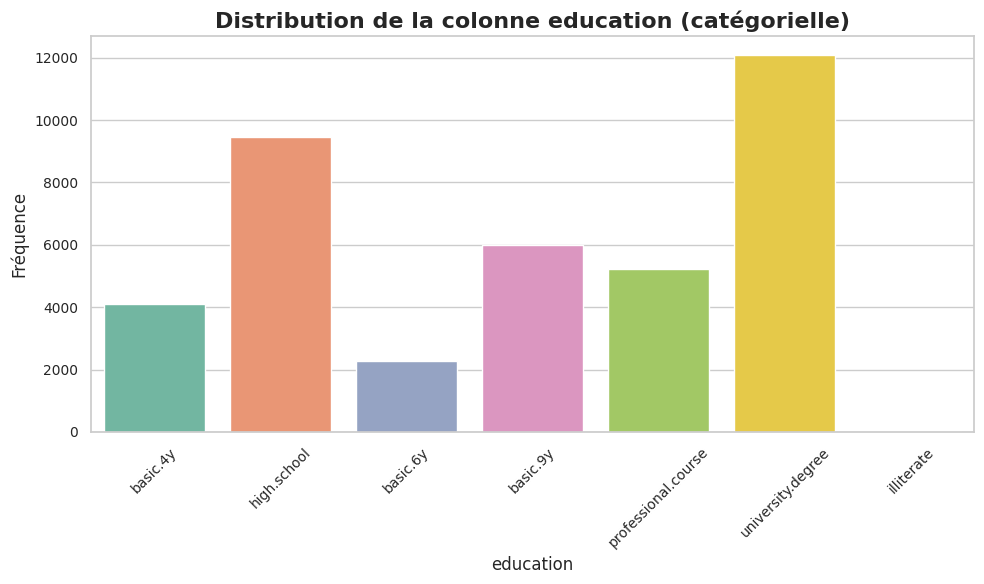

In [199]:
fr.distribution(df ,'education')

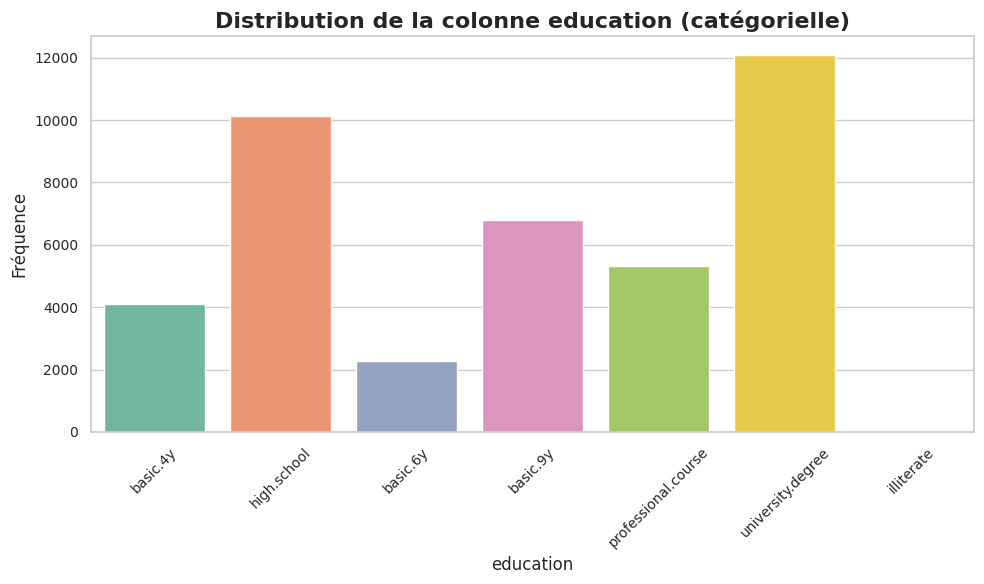

In [200]:
fr.distribution(df_imputed_knn_inverse ,'education')

In [201]:
fr.df_info(df_imputed_knn)


    Longueur du dataset : 40787 enregistrements
    Nombre de colonnes : 33
    Nombre de colonnes numériques : 33
    Nombre de colonnes catégorielles : 0
    Nombre de valeurs manquantes : 0
    


type                               Echantillon  \
age                   float64            [56.0, 57.0, 37.0, 40.0, 56.0]   
default               float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
housing               float64                 [0.0, 0.0, 1.0, 0.0, 0.0]   
loan                  float64                 [0.0, 0.0, 0.0, 0.0, 1.0]   
duration              float64       [261.0, 149.0, 226.0, 151.0, 307.0]   
campaign              float64                 [1.0, 1.0, 1.0, 1.0, 1.0]   
pdays                 float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
pdays_prev_contacted  float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
previous              float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
emp.var.rate          float64                 [1.1, 1.1, 1.1, 1.1, 1.1]   
cons.price.idx        float64  [93.994, 93.994, 93.994, 93.994, 93.994]   
cons.conf.idx         float64       [-36.4, -36.4, -36.4, -36.4, -36.4]   
euribor3m             float64       [4.857, 4.857, 4.857, 4.857, 4.857]   
nr.employed           float64  [5191.0, 5191.0, 5191.0, 5191.0, 5191.0]   
y                     float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_blue-collar       float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_entrepreneur      float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_housemaid         float64                 [1.0, 0.0, 0.0, 0.0, 0.0]   
job_management        float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_retired           float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_self-employed     float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_services          float64                 [0.0, 1.0, 1.0, 0.0, 1.0]   
job_student           float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_technician        float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
job_unemployed        float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
marital_married       float64                 [1.0, 1.0, 1.0, 1.0, 1.0]   
marital_single        float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
contact_telephone     float64                 [1.0, 1.0, 1.0, 1.0, 1.0]   
poutcome_nonexistent  float64                 [1.0, 1.0, 1.0, 1.0, 1.0]   
poutcome_success      float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   
education             float64                 [1.0, 4.0, 4.0, 2.0, 4.0]   
month                 float64                 [2.0, 2.0, 2.0, 2.0, 2.0]   
day_of_week           float64                 [0.0, 0.0, 0.0, 0.0, 0.0]   

                      Nbr V manquantes  % de V manquantes  Nbr L dupliquées  \
age                                  0                0.0                14   
default                              0                0.0                14   
housing                              0                0.0                14   
loan                                 0                0.0                14   
duration                             0                0.0                14   
campaign                             0                0.0                14   
pdays                                0                0.0                14   
pdays_prev_contacted                 0                0.0                14   
previous                             0                0.0                14   
emp.var.rate                         0                0.0                14   
cons.price.idx                       0                0.0                14   
cons.conf.idx                        0                0.0                14   
euribor3m                            0                0.0                14   
nr.employed                          0                0.0                14   
y                                    0                0.0                14   
job_blue-collar                      0                0.0                14   
job_entrepreneur                     0                0.0                14   
job_housemaid                        0              

In [202]:
fr.distribution(df_imputed_knn_inverse)

interactive(children=(Dropdown(description='Select Column', options=('age', 'job', 'marital', 'education', 'de…

In [203]:
fr.sns_plot(df_imputed_knn_inverse,['job','age'],['Barre']) #@TODO : corriger ordre de tri

Output()

## Sélection des features selon leur importance par la technique RFE (*Recursive Feature Elimination*)

RFE (*Recursive Feature Elimination*) est une technique utilisée en apprentissage automatique pour sélectionner les caractéristiques les plus pertinentes pour un modèle prédictif. Cette technique fonctionne en ajustant le modèle, en évaluant l'importance de chaque caractéristique, puis en éliminant les caractéristiques les moins importantes. Cette procédure est répétée jusqu'à ce que le nombre souhaité de caractéristiques soit atteint. L'élimination récursive des caractéristiques peut être très utile pour améliorer l'efficacité des modèles d'apprentissage automatique en réduisant la complexité du modèle, en évitant le surapprentissage, en améliorant l'exactitude et en réduisant les problèmes de multicollinéarité.

In [204]:
X = deposit_term_df.drop('y', axis=1)
y = deposit_term_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)

selector = RFE(pipeline.named_steps['classifier'], n_features_to_select=5)
selector = selector.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train)

onehot_columns = list(pipeline.named_steps['preprocessor'] \
                       .named_transformers_['cat'] \
                       .named_steps['onehot'] \
                       .get_feature_names_out(input_features=categorical_features)
                       )

feature_names = numeric_features.tolist() + onehot_columns

feature_ranks = {
                  name: rank
                  for name, rank in zip(feature_names, selector.ranking_)
                  }

feature_ranks

{'age': 55,
 'campaign': 19,
 'pdays': 14,
 'previous': 43,
 'emp.var.rate': 1,
 'cons.price.idx': 1,
 'cons.conf.idx': 18,
 'euribor3m': 4,
 'nr.employed': 12,
 'job_admin.': 51,
 'job_blue-collar': 34,
 'job_entrepreneur': 52,
 'job_housemaid': 46,
 'job_management': 50,
 'job_retired': 11,
 'job_self-employed': 35,
 'job_services': 37,
 'job_student': 13,
 'job_technician': 48,
 'job_unemployed': 47,
 'job_unknown': 42,
 'marital_divorced': 30,
 'marital_married': 31,
 'marital_single': 32,
 'marital_unknown': 54,
 'education_basic': 15,
 'education_high school': 17,
 'education_missing': 44,
 'education_professional course': 41,
 'education_university degree': 45,
 'default_no': 33,
 'default_unknown': 10,
 'default_yes': 36,
 'housing_no': 26,
 'housing_unknown': 22,
 'housing_yes': 23,
 'loan_no': 24,
 'loan_unknown': 25,
 'loan_yes': 21,
 'contact_cellular': 38,
 'contact_telephone': 5,
 'month_apr': 27,
 'month_aug': 6,
 'month_dec': 8,
 'month_jul': 28,
 'month_jun': 2,
 'mont

## Séparation du jeu de données en un jeu d'apprentissage et un jeu de test



In [205]:
X = deposit_term_df.drop('y', axis=1)
y = deposit_term_df['y']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Création des pipelines d'encodage des variables quantitatives

In [207]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(
                      steps=[
                      ('imputer', SimpleImputer(strategy='median')),
                      ('scaler', StandardScaler())]
                               )

## Création des pipelines d'encodage des variables qualitatives

In [208]:
categorical_features = X.select_dtypes(include=['object']).columns

categorical_transformer = Pipeline(
                        steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                              ]
                                   )

## Regroupement de toutes les pipelines dans le préprocesseur

In [209]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ]
    )

In [210]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

## Pipeline d'encodage de la variable cible

In [211]:
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_test)

## Sous-échantillonnage : Méthode *RandomUnderSampler* pour diminuer la classe majoritaire à 50%

L'objectif du Random Under Sampling est de remédier au problème du déséquilibre de classe, car un déséquilibre peut entraîner un biais dans le modèle de classification. En réduisant la taille de la classe majoritaire, on donne une importance égale aux deux classes lors de l'entraînement du modèle, ce qui peut améliorer la performance du modèle en termes de précision, de rappel et de F1-score pour la classe minoritaire.

In [212]:
rus = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_resample(X_train_preprocessed, y_train)

# Création des modèles

In [213]:
def load_model(file_path):
    """
    Charge un modèle pickle à partir d'un fichier.

    Arguments :
    - file_path : str : chemin du fichier contenant le modèle pickle.

    Retour :
    - model : modèle pickle chargé.
    """
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    return model


def evaluate_model(model, X_test, y_test, feature_names, param_grid=None):
    """
    Évalue un modèle en prédisant les classes sur les données de test et en calculant les métriques.

    Arguments :
    - model : modèle entraîné.
    - X_test : features du jeu de données de test.
    - y_test : labels du jeu de données de test.
    - feature_names : list : noms des caractéristiques.
    - param_grid : dict : grille de paramètres pour GridSearchCV (facultatif).

    Retour :
    - metrics : dict : dictionnaire contenant les scores de métriques.
    """
    if param_grid is not None and len(param_grid) > 0:
        grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)
        grid_search.fit(X_test, y_test)
        model = grid_search.best_estimator_

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

    if hasattr(model, "feature_importances_"):
        X_test_df = pd.DataFrame(X_test, columns=feature_names)
        importances = pd.Series(model.feature_importances_, index = X_test_df.columns)
        sorted_importances = importances.sort_values()

        plt.figure(figsize=(10, 10))
        sorted_importances.plot(kind='barh', color='lightgreen')
        plt.yticks(fontsize=8)
        plt.title('Importance des features')
        plt.show()

    return metrics

In [214]:
def plot_roc_curve(model, X_test, y_test):

    """
    Trace la courbe ROC pour un modèle de classification binaire.

    Arguments :
    - model : modèle entraîné
    - X : features du jeu de données
    - y_true : vraies valeurs de la variable cible

    Retour :
    - None
    """

    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.plot(fpr, tpr, label='Courbe ROC')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Classificateur aléatoire (AUC = 0.5)')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.legend()
    plt.show()


def plot_precision_recall_curve(model, X_test, y_test):
    """
    Tracer la courbe Precision-Recall.

    Arguments:
    - model : modèle déjà entraîné.
    - X_test : features du jeu de données de test.
    - y_test : labels du jeu de données de test.
    """
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='lower left')
    plt.show()

In [215]:
def add_model_scores(df, model_name, metrics):
    """
    Ajoute les scores de métriques d'un modèle à un DataFrame.

    Arguments :
    - df : DataFrame : DataFrame contenant les scores de métriques des modèles.
    - model_name : str : nom du modèle.
    - metrics : dict : dictionnaire contenant les scores de métriques.

    Retour :
    - df : DataFrame : DataFrame mis à jour avec les scores du nouveau modèle.
    """
    df.loc[model_name] = metrics.values()
    return df

In [216]:
model_scores_df = pd.DataFrame(columns=['Accuracy' ,'Precision', 'Recall', 'F1-score', 'ROC AUC'])

## Algorithmes de régression logistique

### Régression logistique dite "simple"


La régression logistique simple est souvent utilisée dans les problèmes de classification binaire lorsque les variables explicatives sont linéaires par rapport à la log-odds de la variable cible. Elle est adaptée aux problèmes avec un grand nombre d'observations et peut fournir une interprétation des coefficients associés à chaque variable explicative. Dans ce jeu de données, la régression logistique simple peut être utilisée pour modéliser la relation entre les caractéristiques des clients et leur propension à souscrire à un terme de dépôt.

### Création, entrainement et exportation du modele

In [217]:
model = LogisticRegression()
model.fit(X_undersampled, y_undersampled)

LogisticRegression()

In [218]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_1_1.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [219]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8335356969402623,
 'Precision': 0.6632395113147198,
 'Recall': 0.7532809569557966,
 'F1-score': 0.6893518348481878,
 'ROC AUC': 0.8114978212787001}

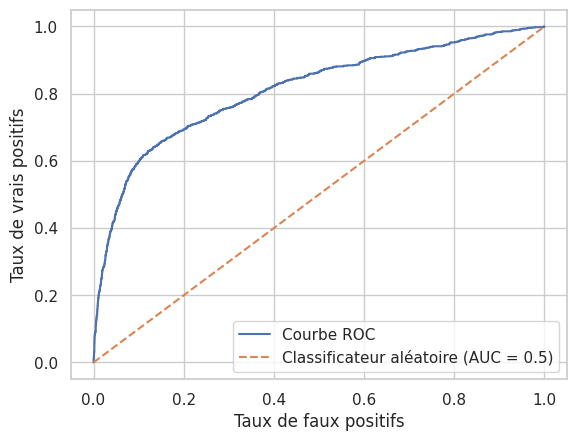

In [220]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

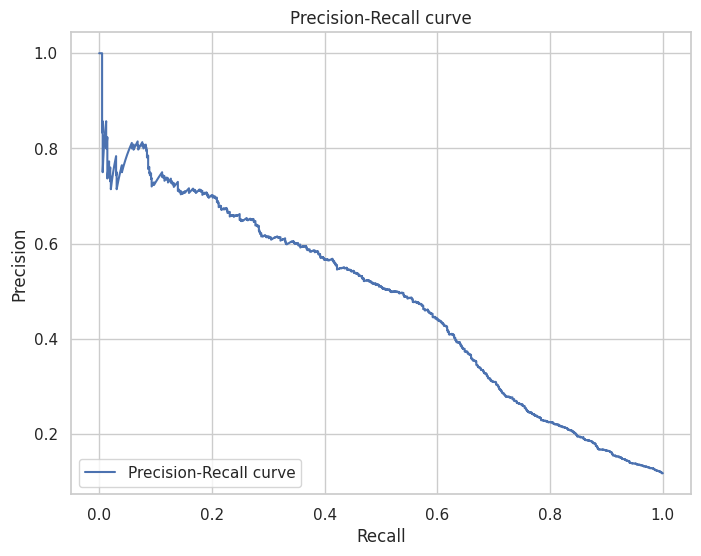

In [221]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [222]:
model_scores_df = add_model_scores(model_scores_df, 'Logistic Regression (simple)', metrics)

## Régression logistique avec le solveur "*saga*"

Régression logistique avec le solveur '*saga*', recommandé pour les grands jeux de données.

### Création, entrainement et exportation du modele

In [223]:
model = LogisticRegression(random_state=0, solver='saga')
model.fit(X_undersampled, y_undersampled)

LogisticRegression(random_state=0, solver='saga')

In [224]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_1_2.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [225]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8335356969402623,
 'Precision': 0.6632395113147198,
 'Recall': 0.7532809569557966,
 'F1-score': 0.6893518348481878,
 'ROC AUC': 0.8114986748702505}

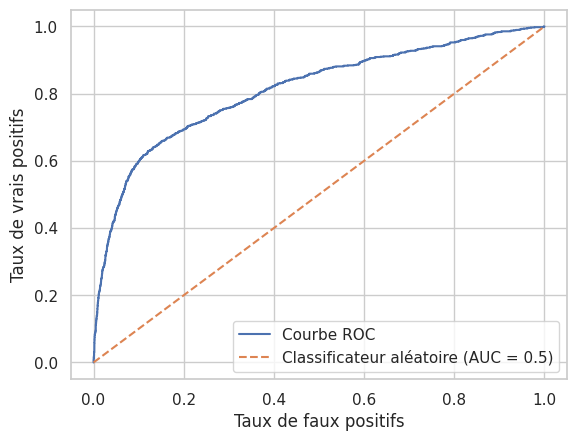

In [226]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

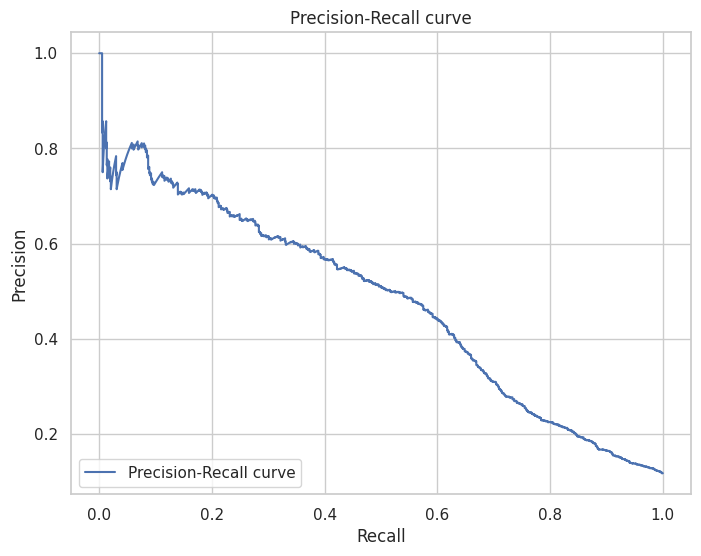

In [227]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [228]:
model_scores_df = add_model_scores(model_scores_df, 'Logistic Regression (saga)', metrics)

## Régression logistique LASSO

La régression logistique Lasso est une variante de la régression logistique qui utilise une pénalisation de type L1 pour régulariser le modèle. La pénalisation L1 favorise la sélection de variables en poussant certains coefficients vers zéro, ce qui permet d'effectuer une sélection de fonctionnalités automatique.

### Création, entrainement et exportation du modele

In [229]:
model = LogisticRegression(random_state=0, penalty='l1', solver='saga', C=0.1)
model.fit(X_undersampled, y_undersampled)

LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='saga')

In [230]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_1_3.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [231]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8233365711510442,
 'Precision': 0.6542349262288838,
 'Recall': 0.7488478292384413,
 'F1-score': 0.6791620298174671,
 'ROC AUC': 0.8121150391023176}

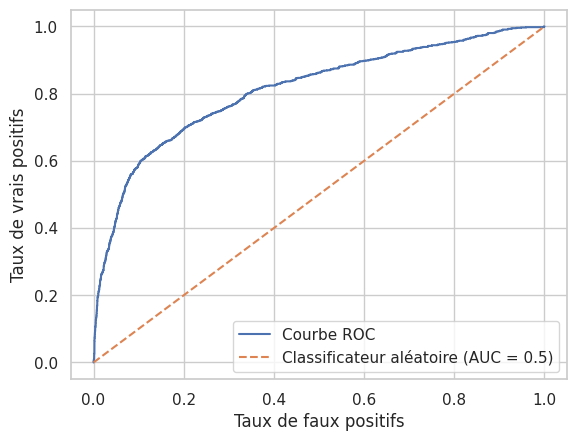

In [232]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

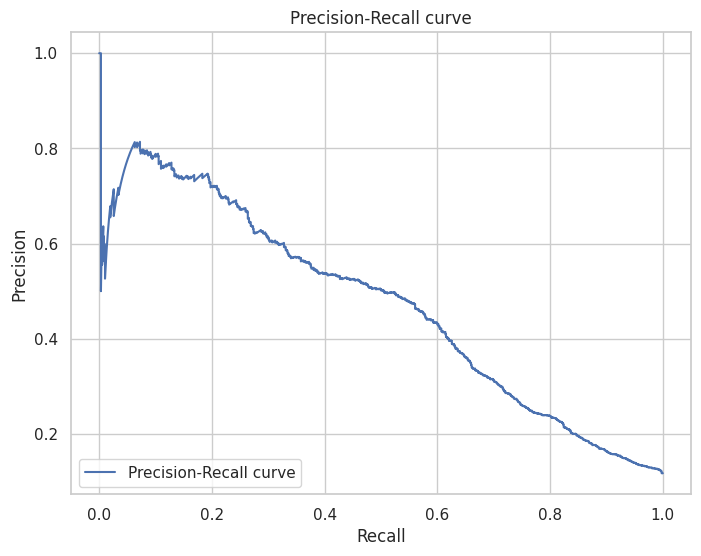

In [233]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [234]:
model_scores_df = add_model_scores(model_scores_df, 'Logistic Regression (l1 + saga)', metrics)

## Régression logistique RIDGE

Même principe que la régularisation L1 sauf que le choix de norme utilisé est celle de la norme euclidienne.

### Création, entrainement et exportation du modele

In [235]:
model = LogisticRegression(random_state=0, penalty='l2', solver='saga', C=0.1)
model.fit(X_undersampled, y_undersampled)

LogisticRegression(C=0.1, random_state=0, solver='saga')

In [236]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_1_4.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [237]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8274647887323944,
 'Precision': 0.6586733326872538,
 'Recall': 0.7534279169677356,
 'F1-score': 0.684415266890193,
 'ROC AUC': 0.8115201569242706}

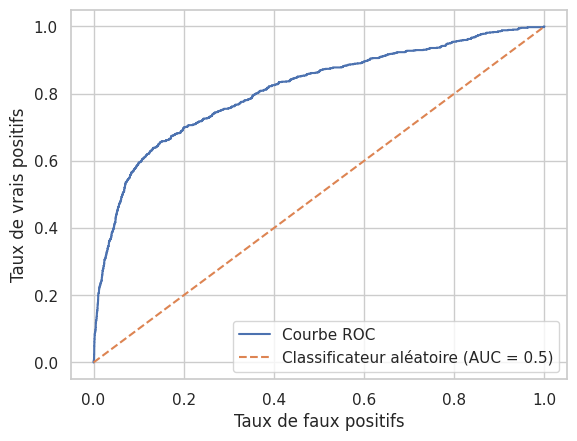

In [238]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

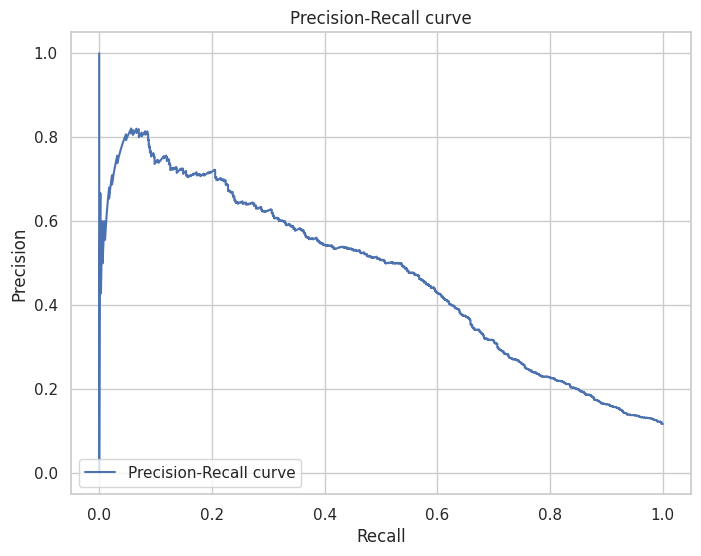

In [239]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [240]:
model_scores_df = add_model_scores(model_scores_df, 'Logistic Regression (l2 + saga)', metrics)

## Régression logistique ELASTICNET

Régression logistique ELASTICNET en basculant le paramètre penalty = 'elasticnet' avec un l1_ratio = 0.5 pour ne favoriser ni RIDGE, ni LASSO.

### Création, entrainement et exportation du modele

In [241]:
model = LogisticRegression(random_state=0, penalty='elasticnet', l1_ratio=0.5, solver='saga', C=0.01, max_iter=100)
model.fit(X_undersampled, y_undersampled)

LogisticRegression(C=0.01, l1_ratio=0.5, penalty='elasticnet', random_state=0,
                   solver='saga')

In [242]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_1_5.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [243]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.7937105390966489,
 'Precision': 0.636315842494302,
 'Recall': 0.7464091181787543,
 'F1-score': 0.6558232129528081,
 'ROC AUC': 0.804977164292046}

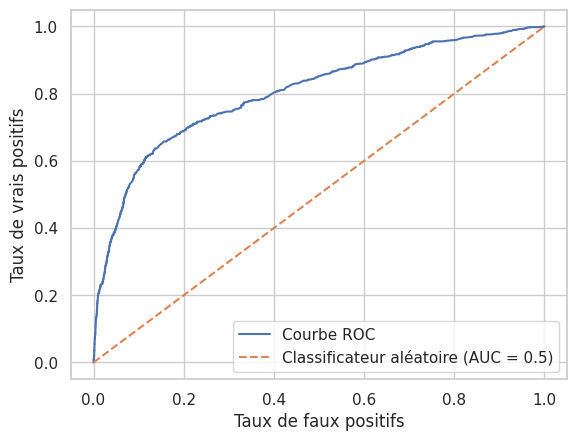

In [244]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

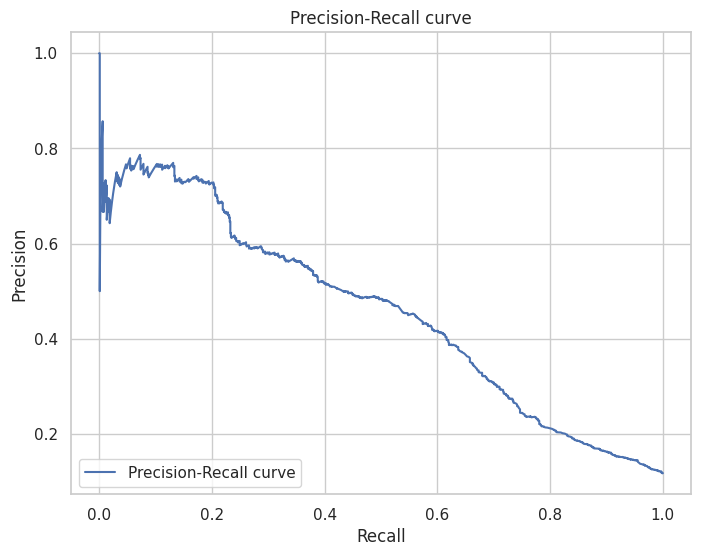

In [245]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [246]:
model_scores_df = add_model_scores(model_scores_df, 'Logistic Regression (elasticnet)', metrics)

## Naive Bayes

Le Naive Bayes est un algorithme de classification basé sur le théorème de Bayes. Il suppose que les caractéristiques d'un échantillon sont indépendantes les unes des autres, d'où le terme "naive" (naïf). Malgré cette simplification, le Naive Bayes peut fournir de bons résultats dans de nombreux cas, notamment lorsque les données sont bien structurées et que les hypothèses d'indépendance sont approximativement satisfaites. Il calcule la probabilité qu'un échantillon appartienne à chaque classe en utilisant la règle de Bayes. Le Naive Bayes est rapide, efficace et nécessite peu de données d'entraînement pour construire un modèle.

### Gaussian Naive Bayes

Le Gaussian Naive Bayes est une variante du Naive Bayes qui suppose que les caractéristiques suivent une distribution gaussienne (normale). Il est utilisé lorsque les caractéristiques sont continues et peut être efficace dans la classification de données numériques.

### Création, entrainement et exportation du modele

In [247]:
model = GaussianNB()
model.fit(X_undersampled, y_undersampled)

GaussianNB()

In [248]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_4_1.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [249]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8472559494900437,
 'Precision': 0.6626832425798488,
 'Recall': 0.7121914070930329,
 'F1-score': 0.6814419432196178,
 'ROC AUC': 0.7858690906390456}

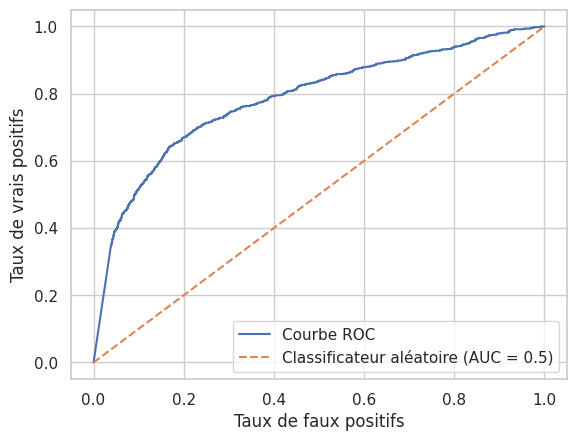

In [250]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

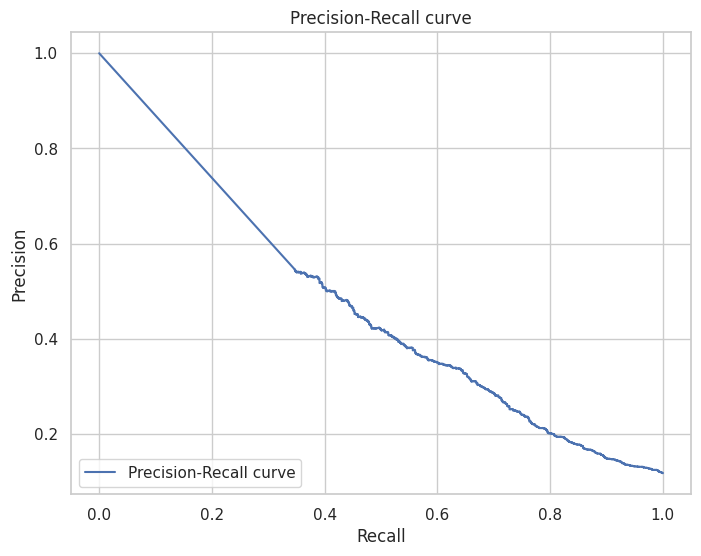

In [251]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [252]:
model_scores_df = add_model_scores(model_scores_df, 'Naive Bayes (GaussianNB)', metrics)

## Algorithmes de SVM (*Support Vector Machine*)

Le SVM (Support Vector Machine) est une méthode pertinente dans ce jeu de données pour plusieurs raisons. Il est adapté à la classification binaire, ce qui correspond à notre problème de prédire la réponse "yes" ou "no". Ensuite, le SVM est capable de séparer les classes de manière optimale en utilisant un hyperplan, ce qui est bénéfique lorsque les données présentent une certaine complexité et une séparation non linéaire

### SVM linéaire dit "classique"

### Création, entrainement et exportation du modele

In [253]:
svm = LinearSVC()
model = CalibratedClassifierCV(svm, method='sigmoid')
model.fit(X_undersampled, y_undersampled)

CalibratedClassifierCV(estimator=LinearSVC())

In [254]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_3_1.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [255]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8210296260320544,
 'Precision': 0.6540161370597493,
 'Recall': 0.7529202433930947,
 'F1-score': 0.6790366719780435,
 'ROC AUC': 0.8111932313604414}

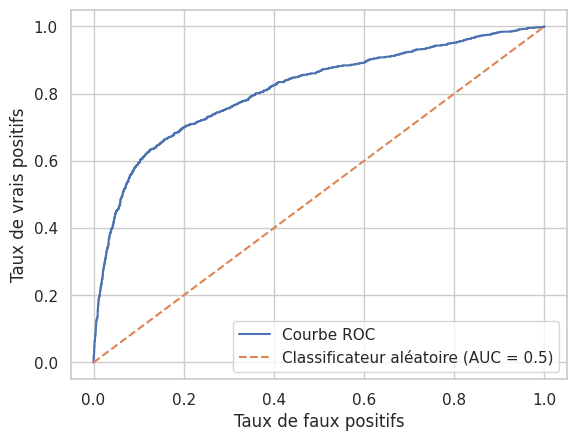

In [256]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

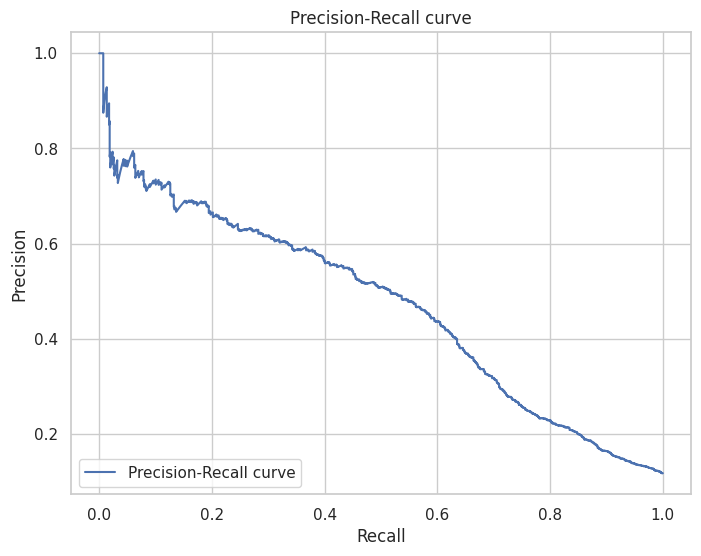

In [257]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [258]:
model_scores_df = add_model_scores(model_scores_df, 'SVM (linéaire)', metrics)

### SVM linéaire LASSO

### Création, entrainement et exportation du modele

In [259]:
svm = LinearSVC(penalty='l1', dual=False)
model = CalibratedClassifierCV(svm, method='sigmoid')
model.fit(X_undersampled, y_undersampled)

CalibratedClassifierCV(estimator=LinearSVC(dual=False, penalty='l1'))

In [260]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_3_2.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [261]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8201796988829528,
 'Precision': 0.6531415568067065,
 'Recall': 0.7519904687967475,
 'F1-score': 0.6779785990098149,
 'ROC AUC': 0.8113464510437504}

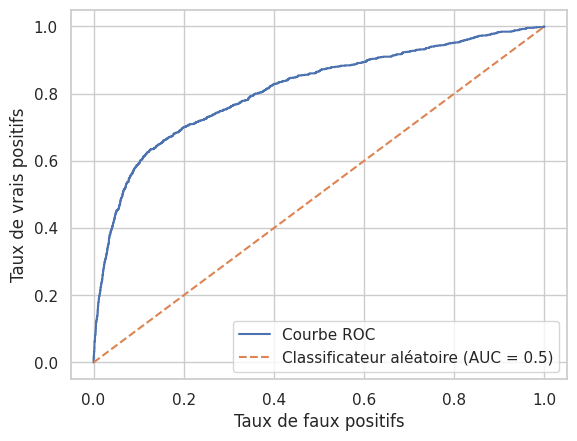

In [262]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

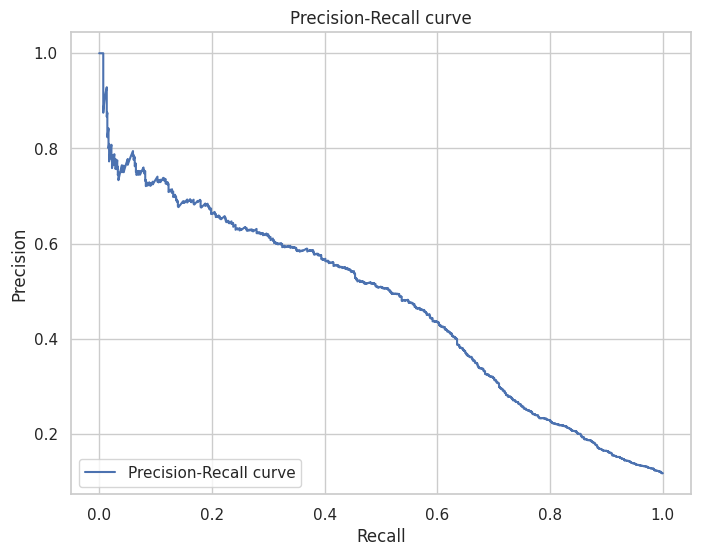

In [263]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [264]:
model_scores_df = add_model_scores(model_scores_df, 'SVM (linéaire + l1)', metrics)

### SVM linéaire RIDGE




### Création, entrainement et exportation du modele

In [265]:
svm = LinearSVC(penalty='l2', dual=False)
model = CalibratedClassifierCV(svm, method='sigmoid')
model.fit(X_undersampled, y_undersampled)

CalibratedClassifierCV(estimator=LinearSVC(dual=False))

In [266]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_3_3.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [267]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8210296260320544,
 'Precision': 0.6540161370597493,
 'Recall': 0.7529202433930947,
 'F1-score': 0.6790366719780435,
 'ROC AUC': 0.8111925200341493}

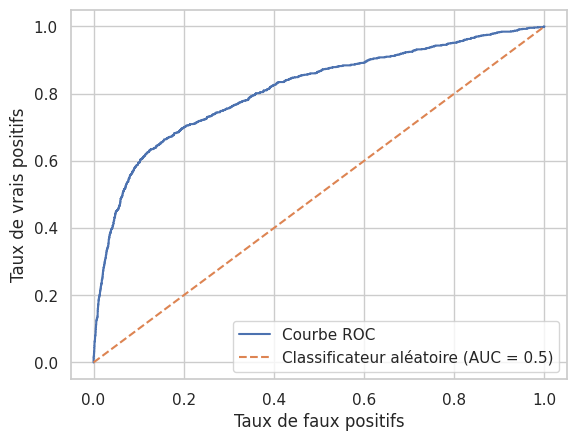

In [268]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

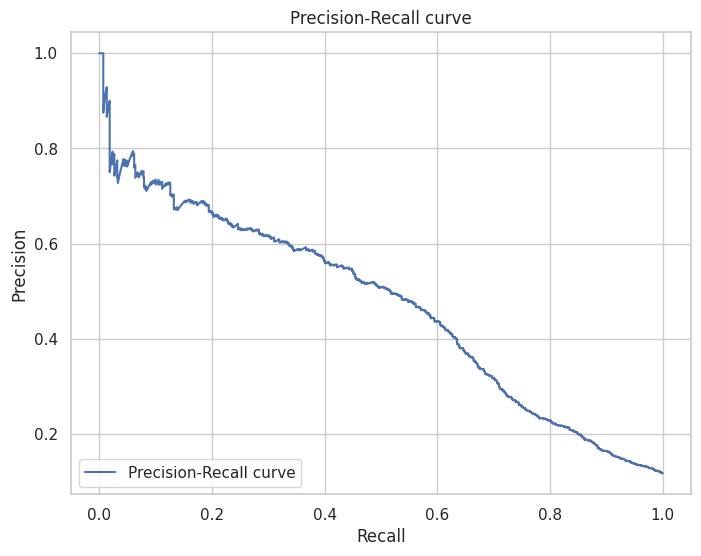

In [269]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [270]:
model_scores_df = add_model_scores(model_scores_df, 'SVM (linéaire + l2)', metrics)

### SVM linéaire ELASTICNET




### Création, entrainement et exportation du modele

In [271]:
svm = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=0.1, l1_ratio=0.5, random_state=42)
model = CalibratedClassifierCV(svm, method='sigmoid')
model.fit(X_undersampled, y_undersampled)

CalibratedClassifierCV(estimator=SGDClassifier(alpha=0.1, l1_ratio=0.5,
                                               penalty='elasticnet',
                                               random_state=42))

In [272]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_3_4.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [273]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.7300874210781932,
 'Precision': 0.6092104073664317,
 'Recall': 0.7309864260448992,
 'F1-score': 0.6079463054757132,
 'ROC AUC': 0.7758391053905304}

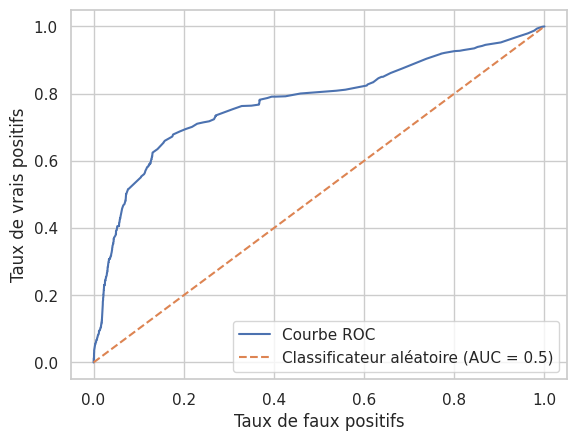

In [274]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

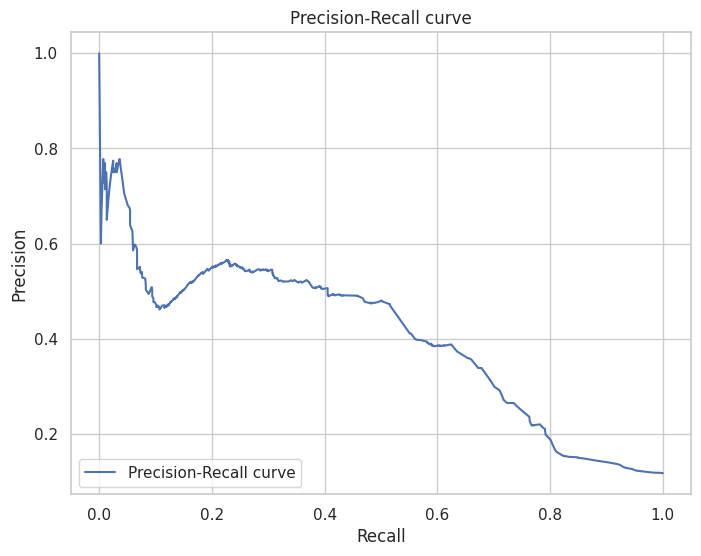

In [275]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [276]:
model_scores_df = add_model_scores(model_scores_df, 'SVM (linéaire + elasticnet)', metrics)

### Recherche des hyperparamètres les plus optimaux
### SVM non linéaire (kernelisation)

Pour améliorer la performance de notre modèle SVC dans notre jeu de données, nous pouvons utiliser différents noyaux pour la construction de l'hyperplan séparateur. En plus des paramètres existants tels que la pénalité et la fonction *loss*, nous pouvons également spécifier les noyaux à considérer, tels que le noyau linéaire, polynomial et RBF. En ajustant ces hyperparamètres, nous pouvons explorer différentes approches pour améliorer la performance de notre modèle SVC dans notre tâche de classification.

In [277]:
hyperparameters_non_linear_svc = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

In [278]:
model = SVC(probability=True)
model.fit(X_undersampled, y_undersampled)

SVC(probability=True)

In [279]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_3_5.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [280]:
metrics = evaluate_model(model,
                         preprocessor.transform(X_test),
                         y_test,
                         feature_names=preprocessor.get_feature_names_out(),
                         param_grid=hyperparameters_non_linear_svc
                         )
metrics

{'Accuracy': 0.9066294317629917,
 'Precision': 0.849020491292849,
 'Recall': 0.6355510495406042,
 'F1-score': 0.6817947075043634,
 'ROC AUC': 0.9225940419594307}

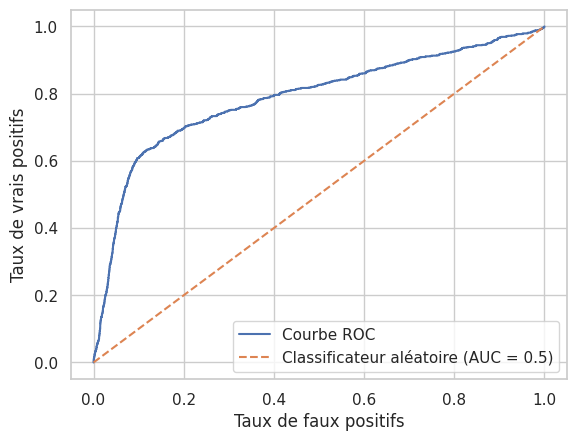

In [281]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

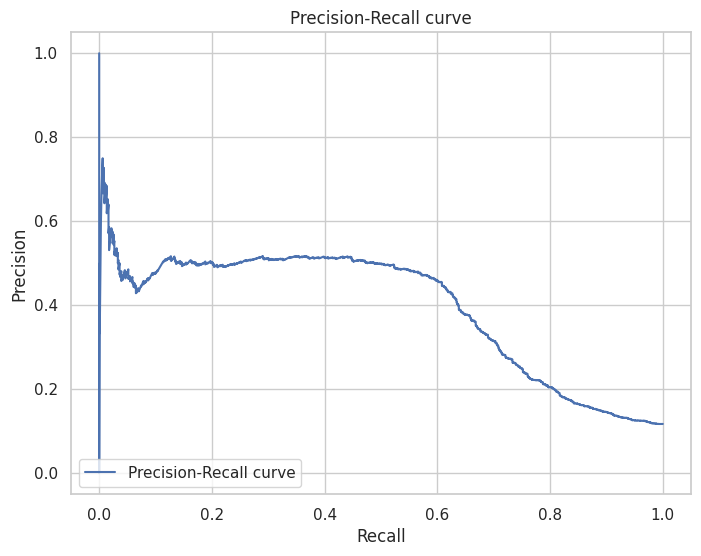

In [282]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [283]:
model_scores_df = add_model_scores(model_scores_df, 'SVM non linéaire (noyau optimal)', metrics)

## Algorithme des k-plus proches voisins


Le k-Nearest Neighbors (KNN) est un algorithme non paramétrique et ne fait aucune hypothèse sur la distribution des données. Il est capable de capturer des relations complexes entre les features et les labels. Dans le même esprit que les SVM, le KNN est adapté aux problèmes de classification avec des frontières de décision non linéaires.

### Algorithme k-NN dite simple

### Création, entrainement et exportation du modele

In [284]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_undersampled, y_undersampled)

KNeighborsClassifier()

In [285]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_5_1.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [286]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.7377367654201068,
 'Precision': 0.6055285353434661,
 'Recall': 0.7164922281200656,
 'F1-score': 0.6075167188219783,
 'ROC AUC': 0.7674549157839463}

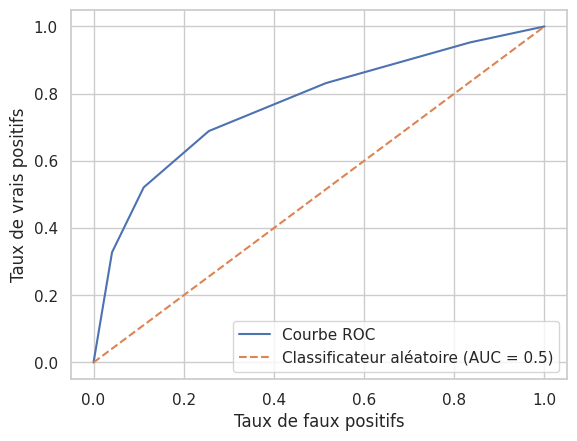

In [287]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

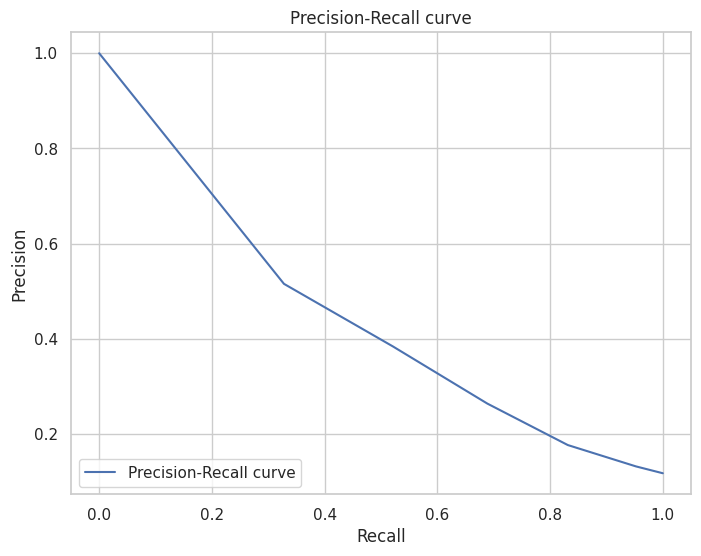

In [288]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [289]:
model_scores_df = add_model_scores(model_scores_df, 'kNN (simple)', metrics)

### Recherche des hyperparamètres les plus optimaux

Pour optimiser les performances du kNN (k plus proches voisins), voici les hyperparamètres importants à prendre en compte :

**n_neighbors** : Le nombre de voisins à considérer lors de la prédiction pour chaque point de données. Une valeur plus élevée de k peut rendre le modèle plus stable, mais peut également le rendre moins sensible aux détails locaux des données. Il est recommandé d'explorer différentes valeurs pour trouver le meilleur compromis entre la sous-représentation et la sur-représentation.

**p** : Le paramètre p de la distance de Minkowski. Pour p=1, on utilise la distance de Manhattan (*Manhattan distance*), tandis que pour p=2, on utilise la distance euclidienne (*Euclidean distance*). Des valeurs plus élevées de p introduisent des variations supplémentaires dans le calcul de la distance, ce qui peut affecter les performances du modèle. Il est courant de tester différentes valeurs de p pour trouver celle qui fonctionne le mieux pour les données spécifiques.

**algorithm** : L'algorithme utilisé pour calculer les k plus proches voisins. Deux options courantes sont "ball_tree" et "kd_tree". L'algorithme "ball_tree" utilise une structure d'arbre de sphères pour accélérer le calcul des voisins, tandis que l'algorithme "kd_tree" utilise une structure d'arbre de recherche multidimensionnelle. Le choix de l'algorithme peut affecter les performances du modèle en termes de temps de calcul et de précision.

**weights** : La méthode utilisée pour pondérer les votes des voisins. Deux options courantes sont "uniform" et "distance". Avec "uniform", tous les voisins contribuent de manière égale aux prédictions, tandis qu'avec "distance", les voisins les plus proches ont une influence plus importante sur les prédictions. Le choix de la méthode de pondération peut avoir un impact sur la façon dont le modèle tient compte de la distance entre les points.

In [290]:
hyperparameters_knn = {
                       "n_neighbors" : list(range(2,10)),
                       "algorithm" : ["ball_tree", "kd_tree"],
                       "weights" : ["uniform", "distance"]
                      }

In [291]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_undersampled, y_undersampled)

KNeighborsClassifier()

In [292]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_5_2.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

In [293]:
metrics = evaluate_model(model,
                         preprocessor.transform(X_test),
                         y_test,
                         feature_names=preprocessor.get_feature_names_out(),
                         param_grid=hyperparameters_knn
                         )
metrics

{'Accuracy': 0.9194997571636717,
 'Precision': 0.9582072617246595,
 'Recall': 0.6571871768355739,
 'F1-score': 0.7173739708519529,
 'ROC AUC': 0.9688283303621235}

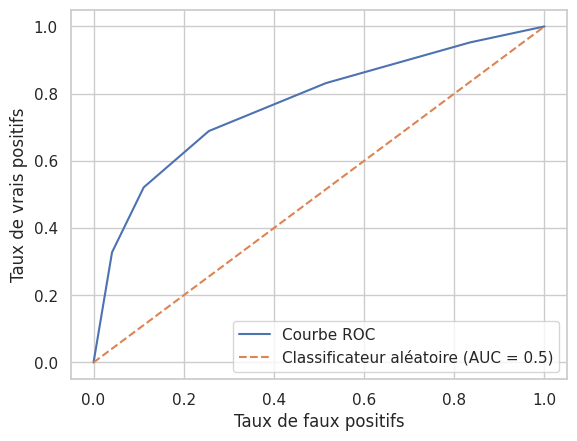

In [294]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

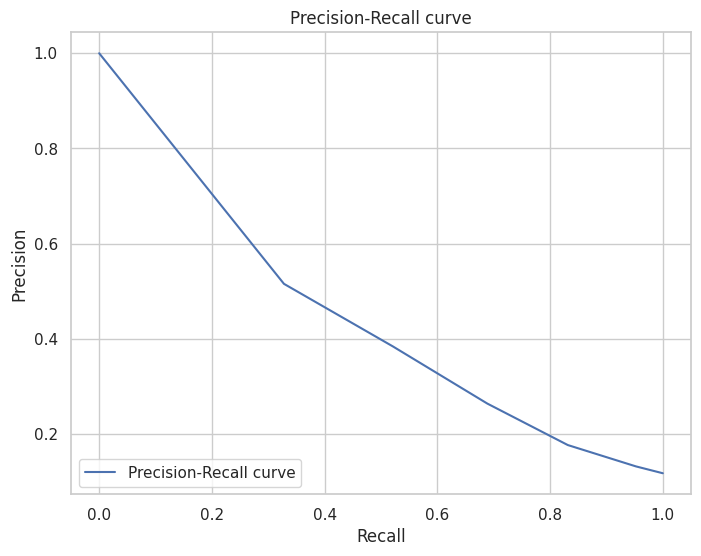

In [295]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [296]:
model_scores_df = add_model_scores(model_scores_df, 'kNN (optimal)', metrics)

## Algorithmes : Arbre de décision, Forêt aléatoire

Les arbres de décision et les forêts aléatoires sont des algorithmes importants dans ce jeu de données car ils permettent de classifier les clients en fonction de leur souscription à un dépôt à terme. Ils utilisent les caractéristiques des clients pour prendre des décisions et trouver les règles permettant de prédire avec précision les résultats. Les forêts aléatoires, en particulier, regroupent plusieurs arbres de décision pour améliorer la précision des prédictions.


## Arbre de décision

### Création, entrainement et exportation du modele

In [297]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_undersampled, y_undersampled)

DecisionTreeClassifier(random_state=0)

In [298]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_2_1.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

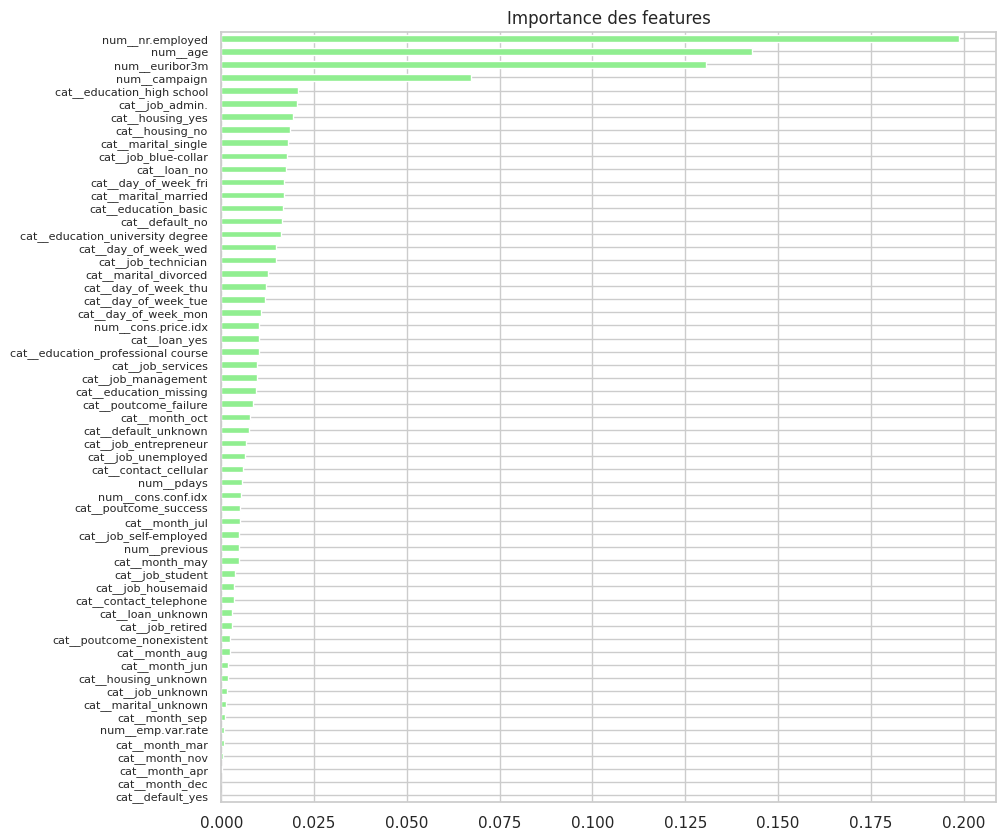

{'Accuracy': 0.6535939776590578,
 'Precision': 0.5650341442594964,
 'Recall': 0.647754990202903,
 'F1-score': 0.5360908841661742,
 'ROC AUC': 0.6483364994466592}

In [299]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

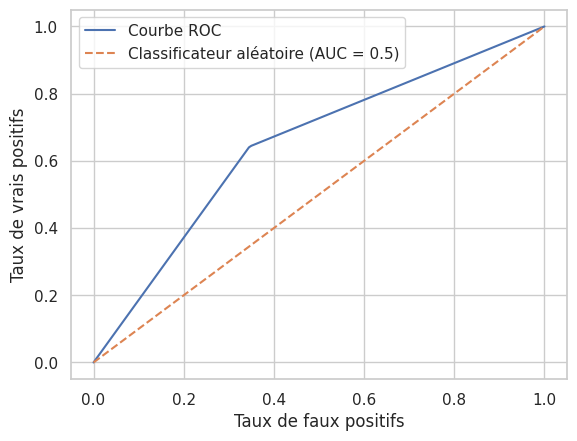

In [300]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

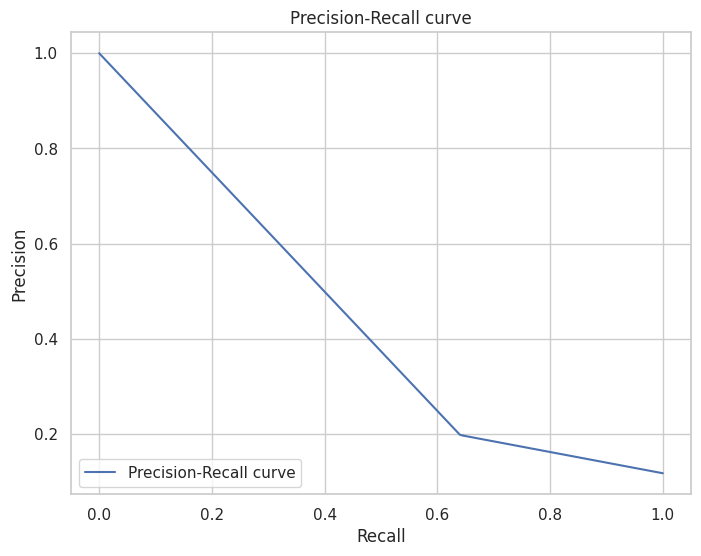

In [301]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [302]:
model_scores_df = add_model_scores(model_scores_df, 'Arbre de décision', metrics)

### Recherche des hyperparamètres les plus optimaux

Pour optimiser les performances de l'arbre de décision, il existe plusieurs hyperparamètres importants à prendre en compte :

**criterion** : Le critère utilisé pour mesurer la qualité de la séparation des nœuds de l'arbre. Deux options courantes sont "gini" et "entropy". Le critère "gini" minimise l'impureté de Gini, tandis que le critère "entropy" minimise l'entropie de Shannon. Le choix du critère peut avoir un impact sur la structure et la précision de l'arbre.

**splitter** : La stratégie utilisée pour choisir la séparation des nœuds de l'arbre. Deux options courantes sont "best" et "random". "best" sélectionne la meilleure séparation en fonction du critère spécifié, tandis que "random" choisit une séparation aléatoire parmi les caractéristiques disponibles.

**max_depth** : La profondeur maximale de chaque arbre de décision. Une profondeur plus grande permet à l'arbre d'apprendre des relations plus complexes dans les données d'entraînement, mais peut également entraîner un surajustement aux données.

**max_features** : Le nombre maximum de caractéristiques à considérer lors de la recherche de la meilleure séparation à chaque nœud de l'arbre. Cela permet de contrôler la diversité des arbres. Les options courantes incluent "log2" (logarithme base 2 du nombre total de caractéristiques) et "sqrt" (racine carrée du nombre total de caractéristiques). En réduisant le nombre de caractéristiques à considérer, vous pouvez améliorer l'efficacité et la généralisation de l'arbre.

In [303]:
hyperparameters_DTC = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": list(range(5, 16)),
    "max_features": ["log2", "sqrt"],
}

In [304]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_undersampled, y_undersampled)

DecisionTreeClassifier(random_state=0)

In [305]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_3_7.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

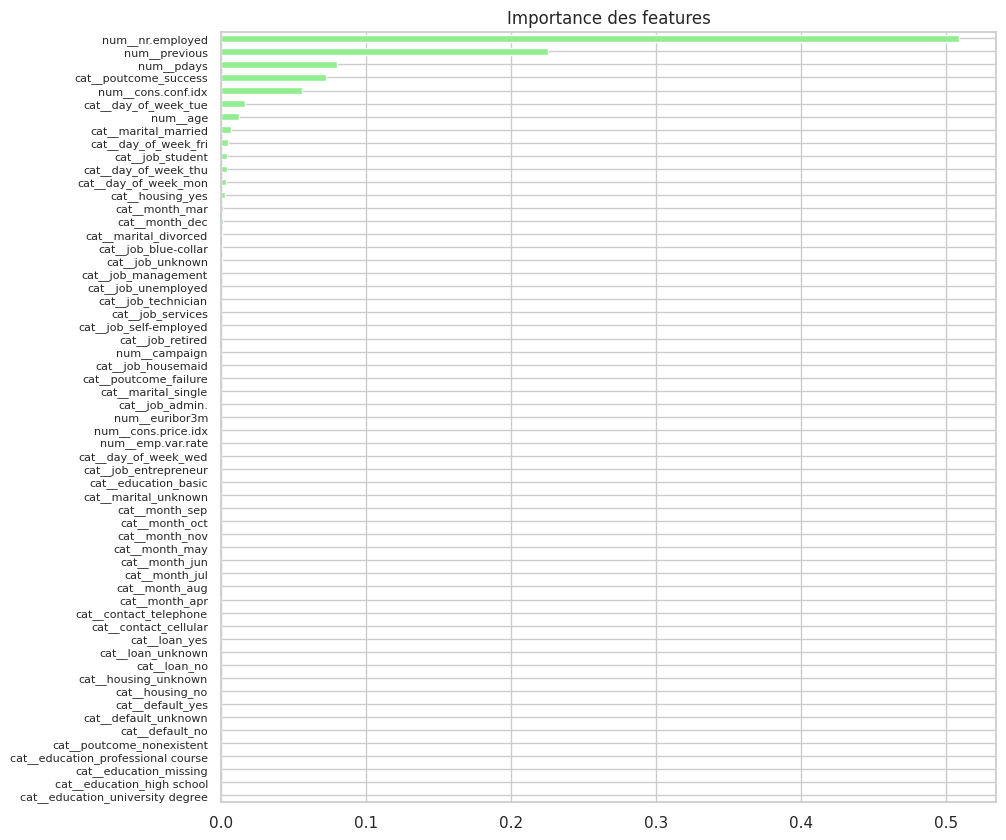

{'Accuracy': 0.8998300145701797,
 'Precision': 0.8138117527394648,
 'Recall': 0.6137679622336955,
 'F1-score': 0.6528159403301445,
 'ROC AUC': 0.7674128052674566}

In [306]:
metrics = evaluate_model(model,
                         preprocessor.transform(X_test),
                         y_test,
                         feature_names=preprocessor.get_feature_names_out(),
                         param_grid=hyperparameters_DTC
                         )
metrics

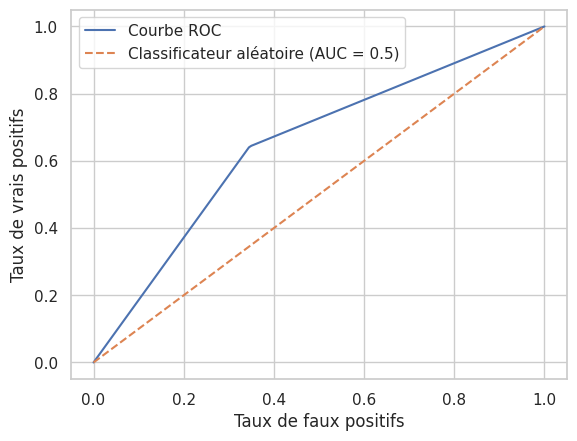

In [307]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

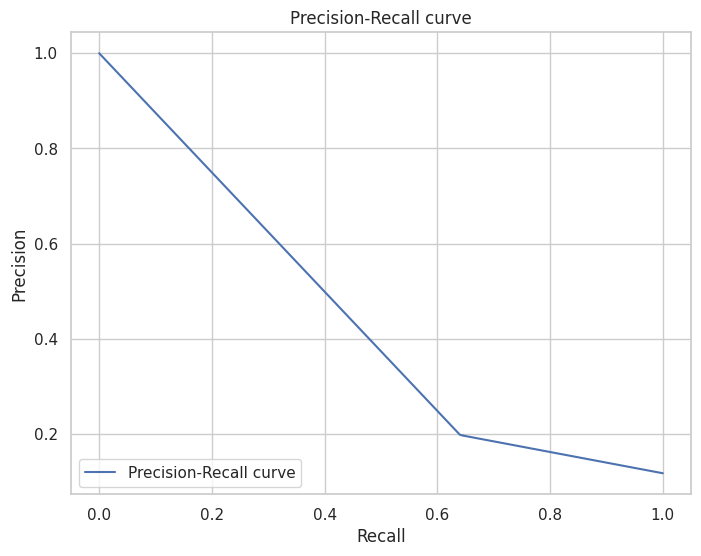

In [308]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [309]:
model_scores_df = add_model_scores(model_scores_df, 'Arbre de décision (optimal)', metrics)

## Forêt aléatoire

### Création, entrainement et exportation du modele

In [310]:
model = RandomForestClassifier(n_estimators = 10, random_state = 0)
model.fit(X_undersampled, y_undersampled)

RandomForestClassifier(n_estimators=10, random_state=0)

In [311]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_2_2.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

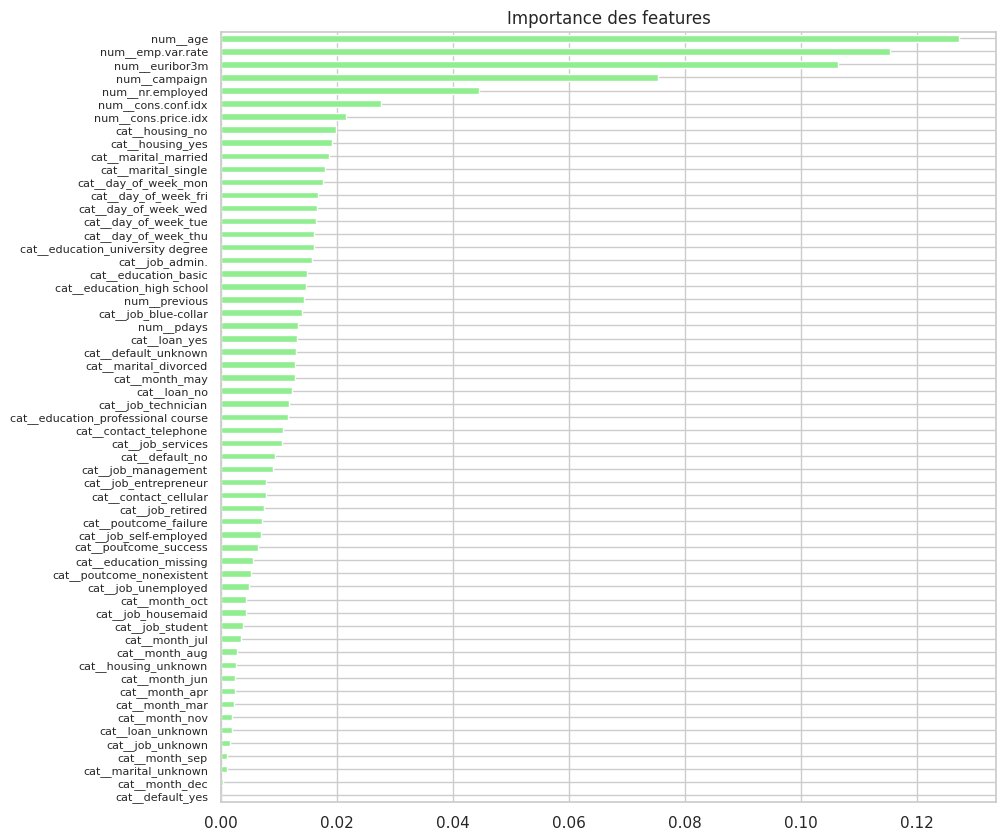

{'Accuracy': 0.7814473045167557,
 'Precision': 0.6196935975872754,
 'Recall': 0.716151360560912,
 'F1-score': 0.6350822054575207,
 'ROC AUC': 0.7617964573958942}

In [312]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

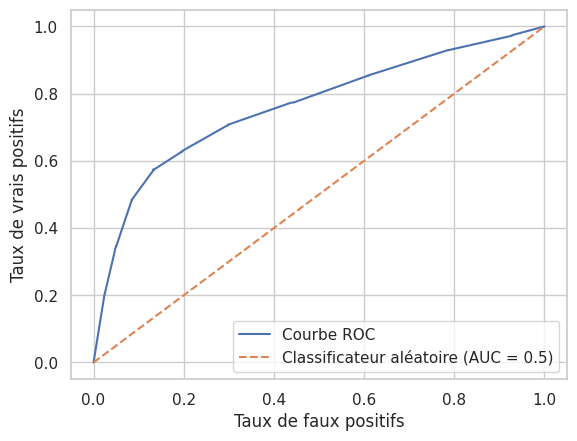

In [313]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

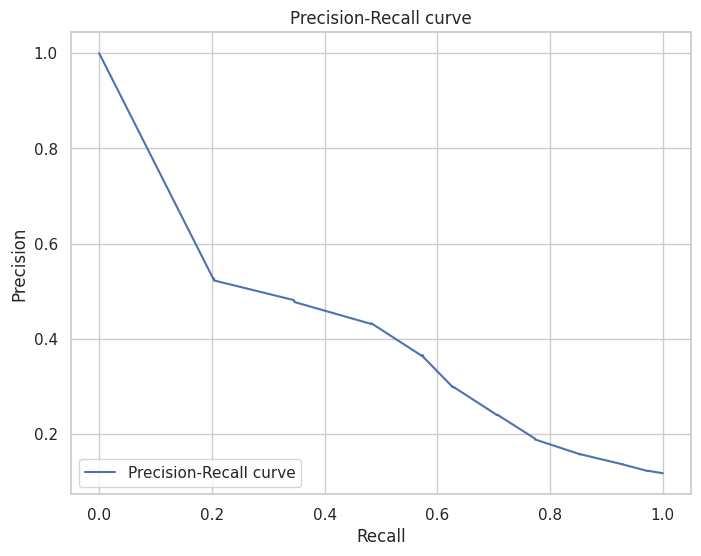

In [314]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [315]:
model_scores_df = add_model_scores(model_scores_df, 'Forêt aléatoire', metrics)

### Recherche des hyperparamètres les plus optimaux

Pour optimiser les performances de la forêt aléatoire, il existe plusieurs hyperparamètres importants à prendre en compte :

*   **n_estimators** : Le nombre d'arbres dans la forêt. Un nombre plus élevé d'arbres peut améliorer la précision, mais nécessite également plus de temps de calcul.
*   **max_features** : Le nombre maximum de caractéristiques à considérer lors de la recherche de la meilleure séparation à chaque nœud de l'arbre. Cela permet de contrôler la diversité des arbres.
*   **max_depth** : La profondeur maximale de chaque arbre. Une profondeur plus grande permet au modèle d'apprendre des relations complexes, mais peut également entraîner un surajustement aux données d'entraînement.


In [316]:
hyperparameters_rfc = {
                       "n_estimators" : [10, 50],
                       "max_features" : [10, 100, 1000],
                       "max_depth" : [3, 5, 7]
                      }

In [317]:
model = RandomForestClassifier(random_state = 0)
model.fit(X_undersampled, y_undersampled)

RandomForestClassifier(random_state=0)

In [318]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_3_6.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

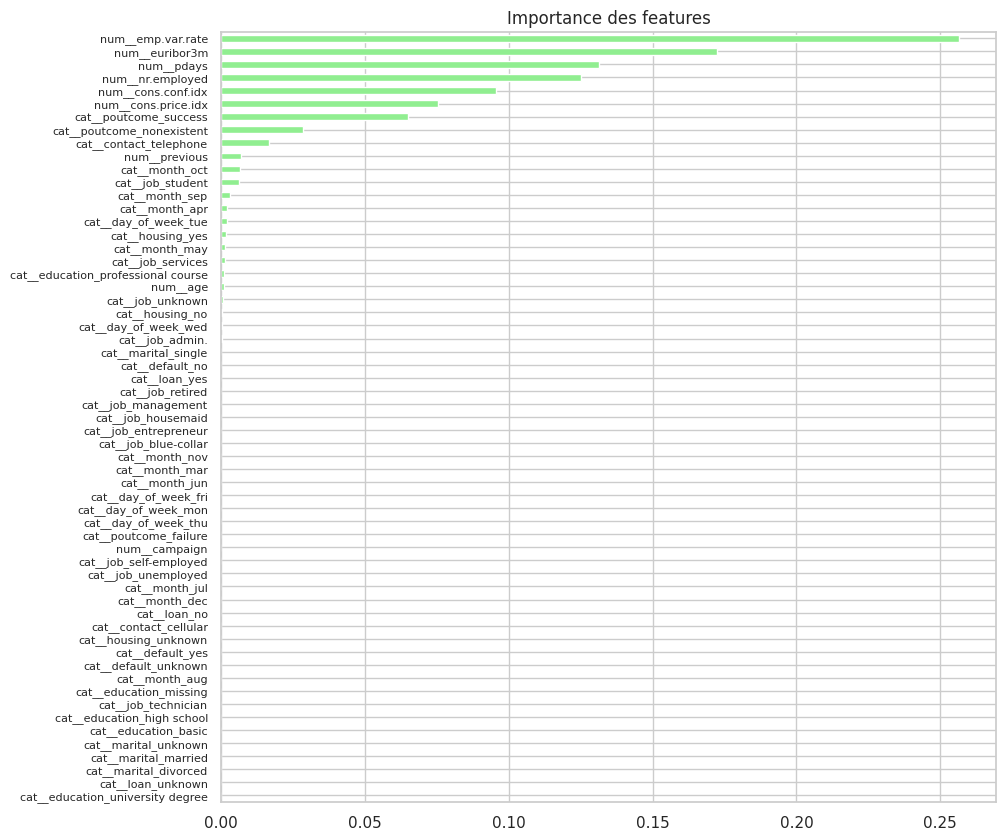

{'Accuracy': 0.8961874696454589,
 'Precision': 0.8200455228073324,
 'Recall': 0.5852560127344478,
 'F1-score': 0.6160523903666377,
 'ROC AUC': 0.8088774374840219}

In [319]:
metrics = evaluate_model(model,
                         preprocessor.transform(X_test),
                         y_test,
                         feature_names=preprocessor.get_feature_names_out(),
                         param_grid=hyperparameters_rfc
                         )
metrics

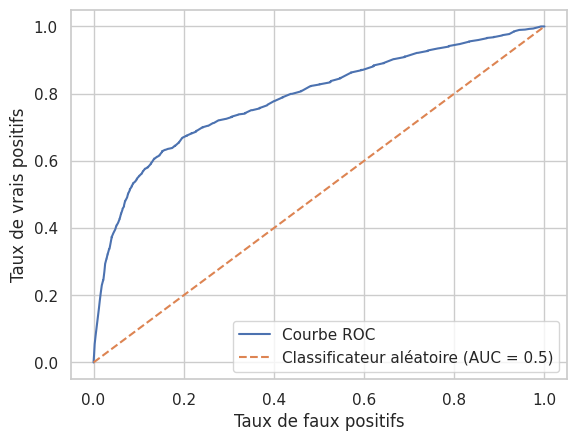

In [320]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

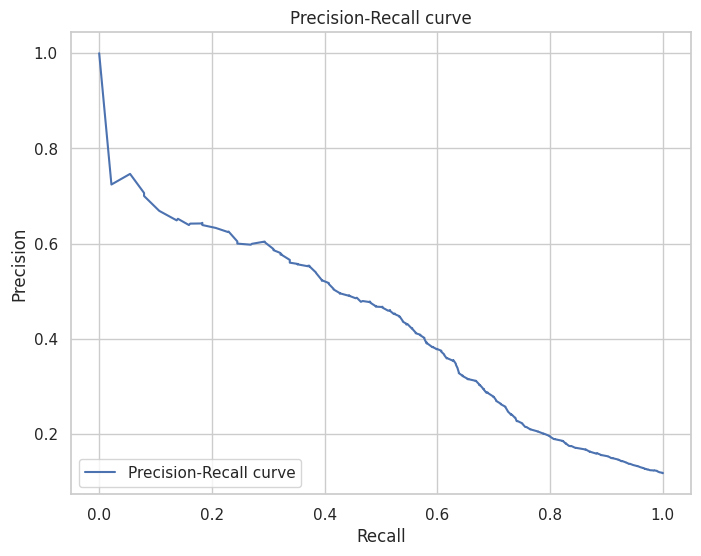

In [321]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [322]:
model_scores_df = add_model_scores(model_scores_df, 'Forêt aléatoire (optimal)', metrics)

# Méthodes d'ensemble

### Gradient Boosting

Le Gradient Boosting est une technique d'apprentissage ensembliste qui combine plusieurs modèles d'arbres de décision plus faibles pour former un modèle plus puissant. Il est capable de gérer des données complexes avec des relations non linéaires, ce qui peut être bénéfique pour notre jeu de données.

### Création, entrainement et exportation du modele

In [323]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=.01, max_depth=5, random_state=1)
model.fit(X_undersampled, y_undersampled)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=1)

In [324]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_2_5.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

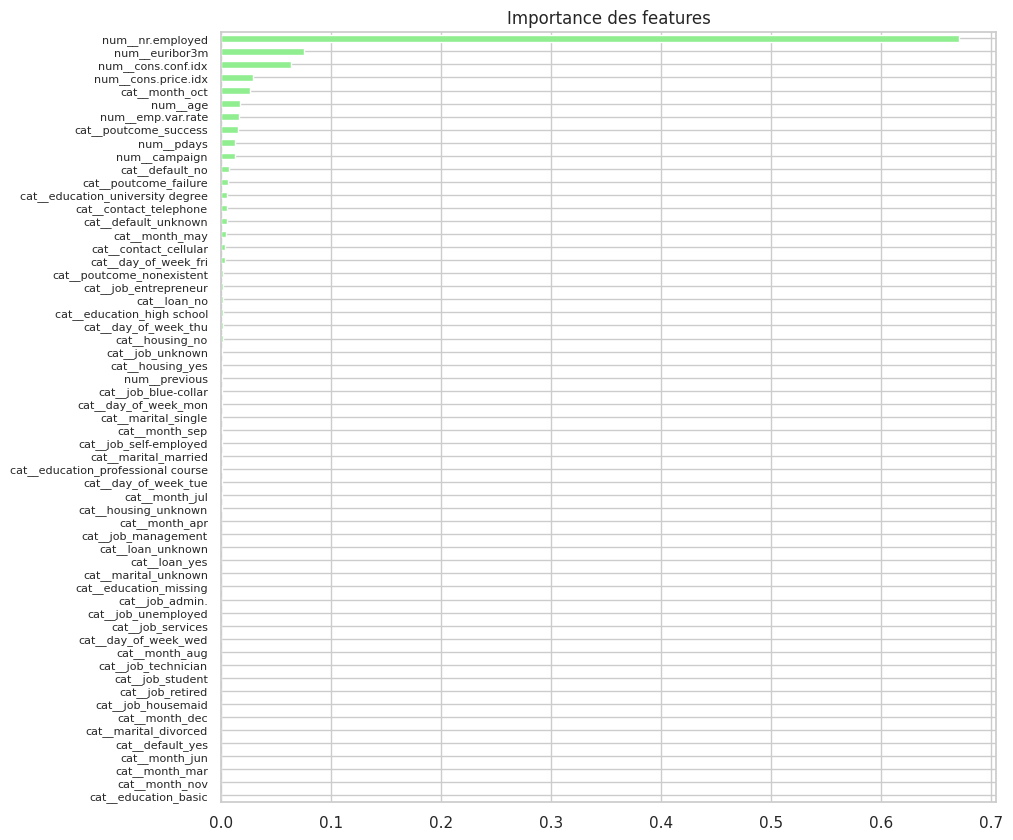

{'Accuracy': 0.852112676056338,
 'Precision': 0.68058327448469,
 'Recall': 0.7548395439943218,
 'F1-score': 0.7062127474134053,
 'ROC AUC': 0.8182643837645179}

In [325]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

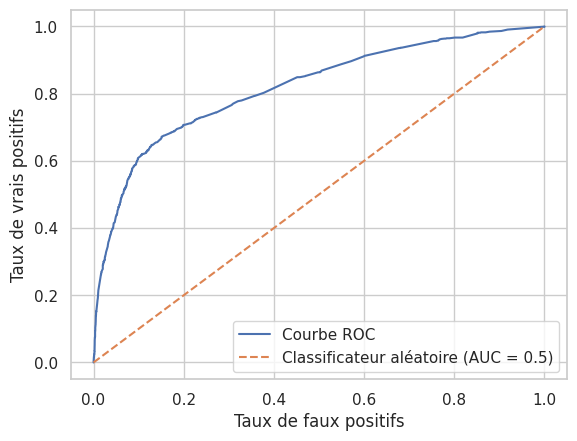

In [326]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

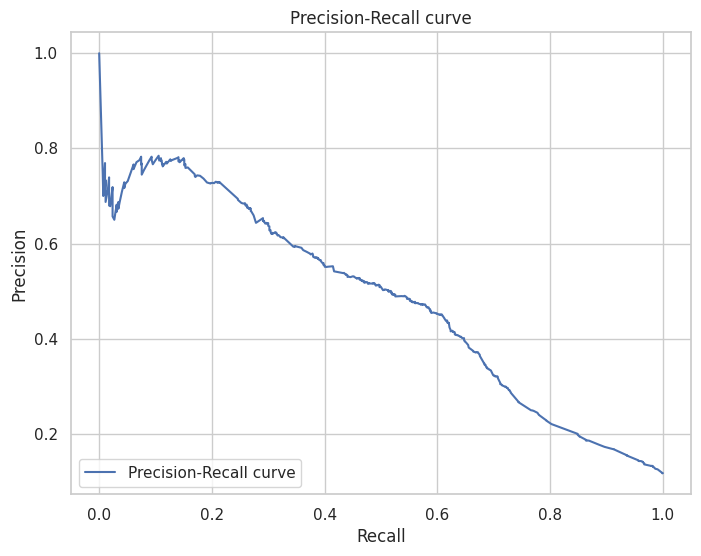

In [327]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [328]:
model_scores_df = add_model_scores(model_scores_df, 'Gradient Boosting', metrics)

##  Arbre de décision + AdaBoost

Les méthodes d'ensemble combinent plusieurs modèles d'apprentissage pour améliorer les performances prédictives et réduire les erreurs. Dans le cas d'AdaBoost, des arbres de décision faibles sont utilisés comme classifieurs de base. L'avantage de cette approche est qu'elle permet de capturer les interactions complexes entre les variables et d'identifier les caractéristiques importantes pour prédire la souscription à un dépôt à terme.

### Création, entrainement et exportation du modele

In [329]:
dtree = DecisionTreeClassifier(max_depth = 1, random_state = 0)
model = AdaBoostClassifier(base_estimator = dtree, n_estimators = 10, random_state = 0)
model.fit(X_undersampled, y_undersampled)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=0),
                   n_estimators=10, random_state=0)

In [330]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_2_3.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

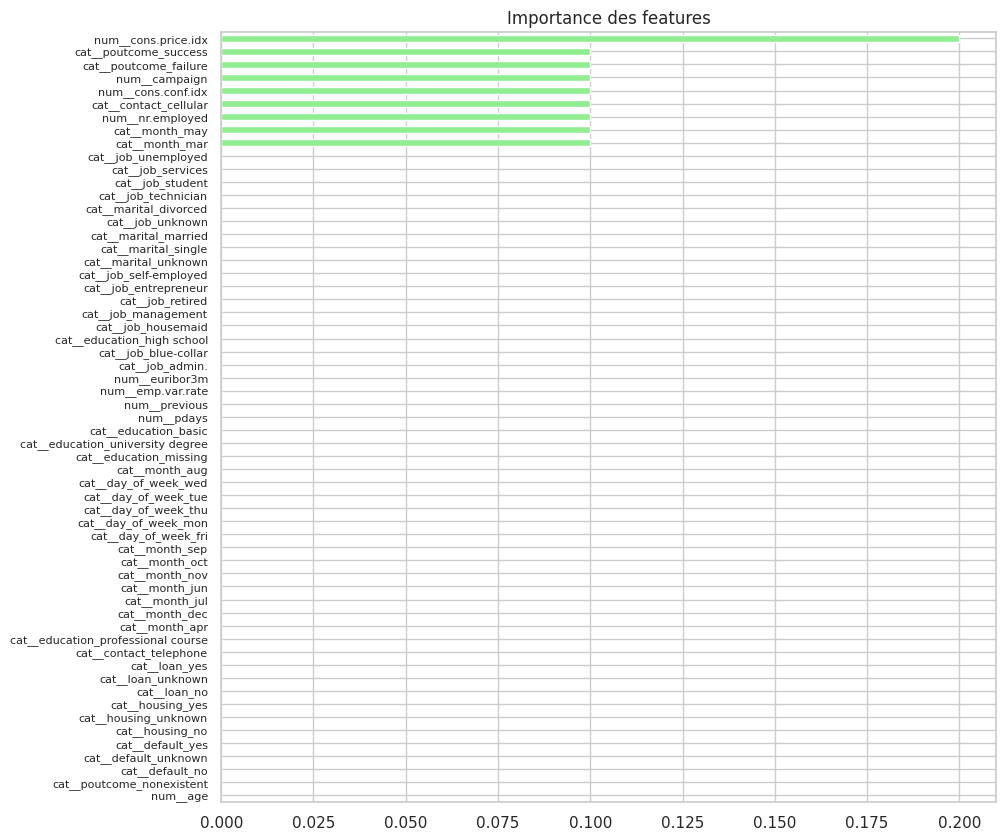

{'Accuracy': 0.8500485672656629,
 'Precision': 0.6763472327631561,
 'Recall': 0.7473943050932528,
 'F1-score': 0.7009930573616129,
 'ROC AUC': 0.8067980173344527}

In [331]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

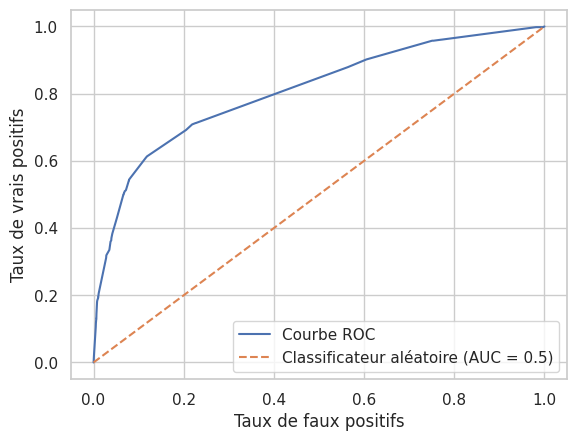

In [332]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

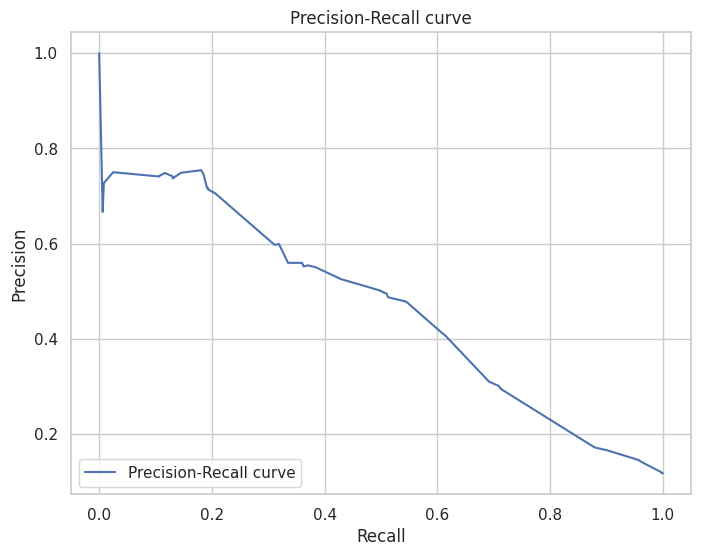

In [333]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [334]:
model_scores_df = add_model_scores(model_scores_df, 'Arbre de décision (Ada Boost)', metrics)

## Forêt aléatoire + Ada Boost

### Création, entrainement et exportation du modele

In [335]:
base_classifier = RandomForestClassifier(random_state=0)
model = AdaBoostClassifier(base_classifier, random_state=0)
model.fit(X_undersampled, y_undersampled)

AdaBoostClassifier(estimator=RandomForestClassifier(random_state=0),
                   random_state=0)

In [336]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_2_4.pkl', 'wb') as file:
    pickle.dump(model, file)

### Evaluation du modele

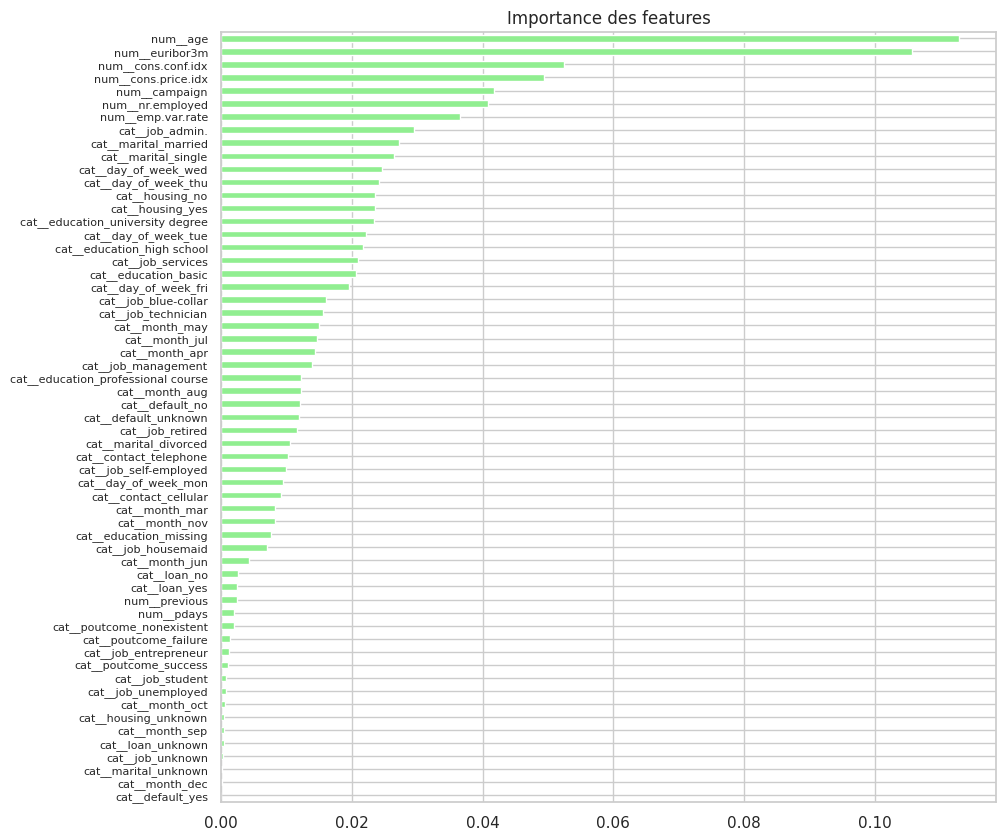

{'Accuracy': 0.7883681398737251,
 'Precision': 0.6300047382880346,
 'Recall': 0.7357618439739921,
 'F1-score': 0.6478121569057799,
 'ROC AUC': 0.7902892010852562}

In [337]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

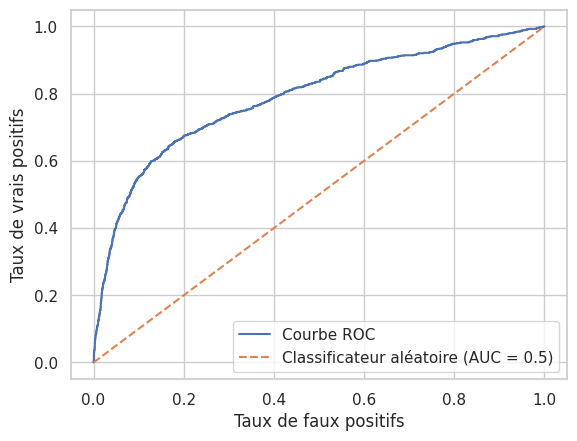

In [338]:
plot_roc_curve(model, preprocessor.transform(X_test), y_true_encoded)

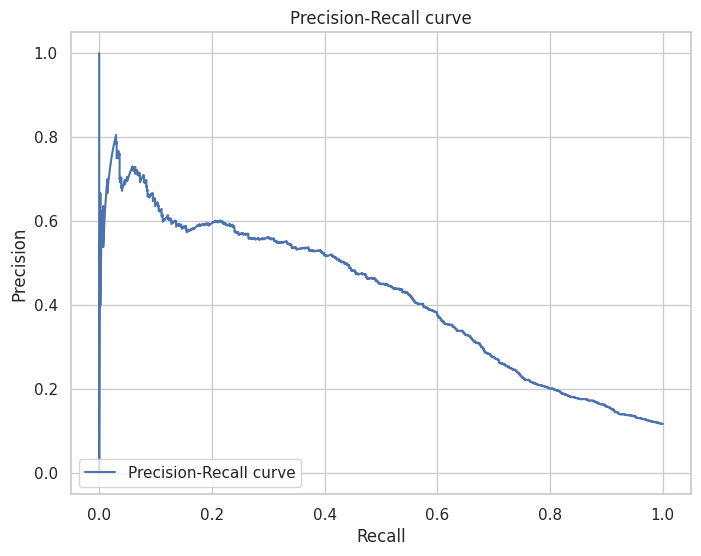

In [339]:
plot_precision_recall_curve(model, preprocessor.transform(X_test), y_true_encoded)

In [340]:
model_scores_df = add_model_scores(model_scores_df, 'Forêt aléatoire (Ada Boost)', metrics)

## Classification par vote

La classification par vote, également appelée vote majoritaire, est une méthode d'ensemble qui combine les prédictions de plusieurs algorithmes de classification pour prendre une décision finale. Dans le cadre de ce dataset, l'utilisation d'un Voting Classifier peut être bénéfique car il permet d'exploiter la diversité des algorithmes et de tirer parti de leurs forces respectives. Chaque algorithme de classification contribue à la décision finale en votant pour une classe prédite. Le vote majoritaire est ensuite utilisé pour déterminer la classe finale. Cela peut améliorer la précision et la stabilité des prédictions, en réduisant potentiellement les erreurs dues à un seul algorithme. De plus, le Voting Classifier permet de combiner des algorithmes de classification variés, tels que la régression logistique, l'arbre de décision, le SVM, le KNN, le Naive Bayes, la forêt aléatoire, et l'AdaBoost, afin de tirer parti de leurs différentes approches et capacités de modélisation.

### Création, entrainement et exportation du modele

In [341]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()

voting_classifier = VotingClassifier(
    estimators=[
        ('lr', logistic_regression),
        ('dt', decision_tree),
        ('knn', knn),
        ('nb', naive_bayes),
        ('rf', random_forest),
        ('adaboost', adaboost)
    ],
    voting='soft'
)

voting_classifier.fit(X_undersampled, y_undersampled)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB()),
                             ('rf', RandomForestClassifier()),
                             ('adaboost', AdaBoostClassifier())],
                 voting='soft')

In [342]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_2_6.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)

### Evaluation du modele

In [343]:
metrics = evaluate_model(voting_classifier, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

{'Accuracy': 0.8261291889266634,
 'Precision': 0.654806708550765,
 'Recall': 0.7446022782643013,
 'F1-score': 0.6795713487259254,
 'ROC AUC': 0.7990087810385449}

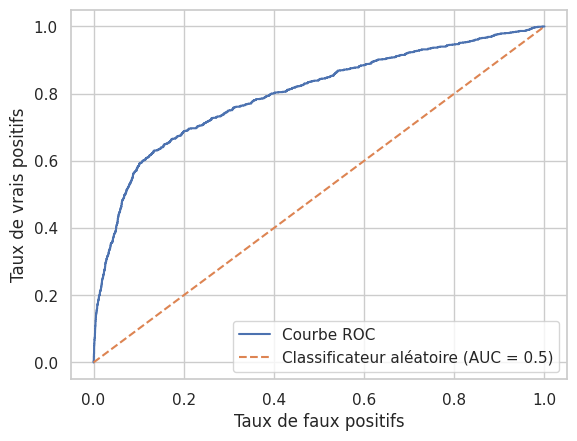

In [344]:
plot_roc_curve(voting_classifier, preprocessor.transform(X_test), y_true_encoded)

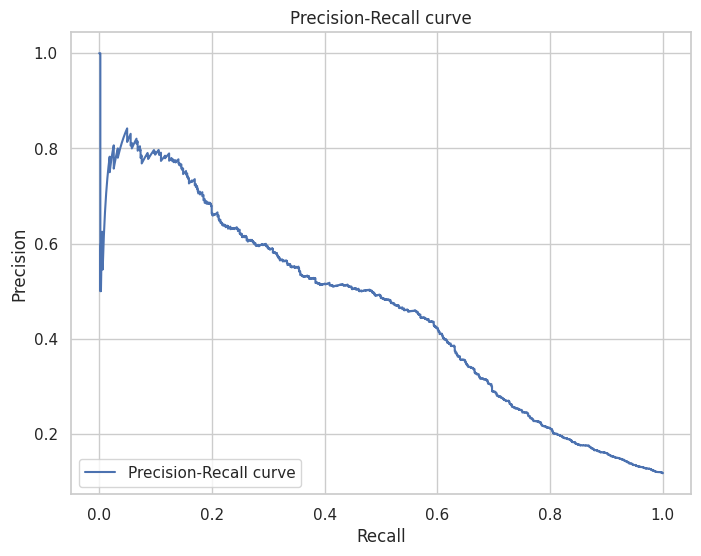

In [345]:
plot_precision_recall_curve(voting_classifier, preprocessor.transform(X_test), y_true_encoded)

In [346]:
model_scores_df = add_model_scores(model_scores_df, 'Vote Classificateur', metrics)

## Classification par Stacking
Le stacking est une stratégie d'ensemble où plusieurs modèles de base, tels que des arbres de décision ou des SVM, sont combinés pour produire des prédictions. Ces prédictions sont ensuite utilisées comme entrées pour un méta-modèle (par exemple, une régression logistique) qui produit la prédiction finale. Cette technique vise à tirer parti de la diversité et de la complémentarité des modèles de base pour améliorer l'exactitude globale.

In [347]:
base_models = [
    ('SVC', SVC(probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('GNB', GaussianNB()),
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_undersampled, y_undersampled)

StackingClassifier(cv=5,
                   estimators=[('SVC', SVC(probability=True)),
                               ('KNN', KNeighborsClassifier()),
                               ('DT', DecisionTreeClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('GB', GradientBoostingClassifier()),
                               ('GNB', GaussianNB())],
                   final_estimator=LogisticRegression())

### Création, entrainement et exportation du modele

In [348]:
with open(r'/content/drive/MyDrive/Colab Notebooks/4MLSP/models/model_2_7.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)

### Evaluation du modele

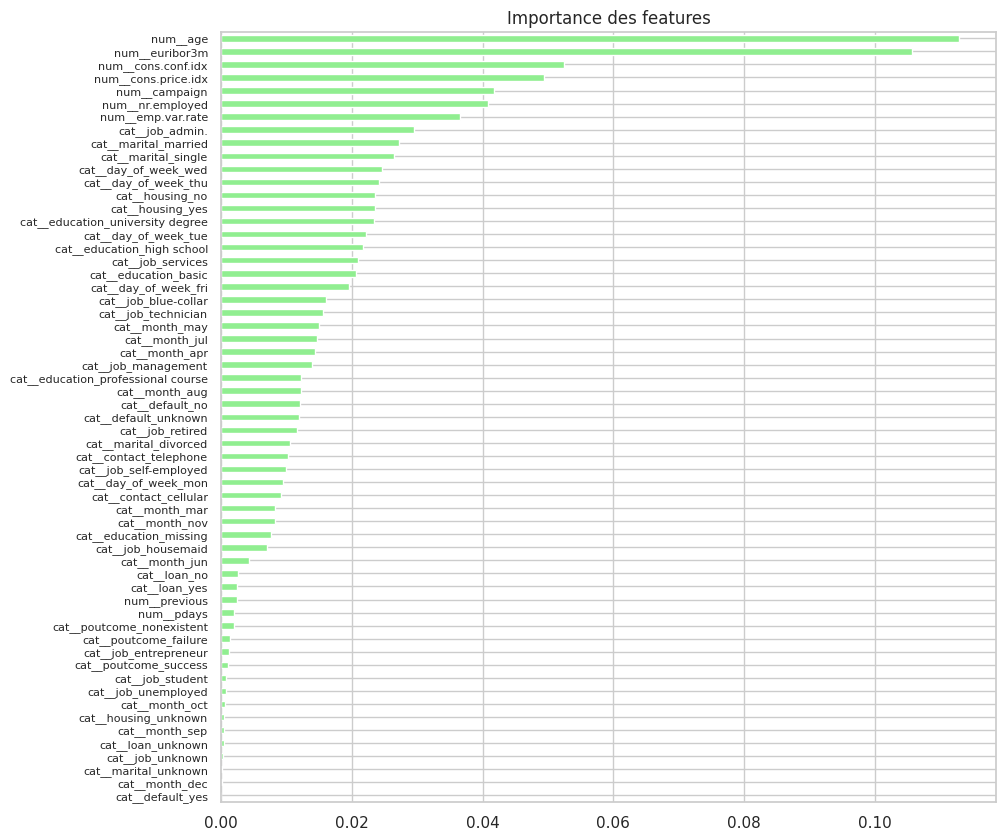

{'Accuracy': 0.7883681398737251,
 'Precision': 0.6300047382880346,
 'Recall': 0.7357618439739921,
 'F1-score': 0.6478121569057799,
 'ROC AUC': 0.7902892010852562}

In [349]:
metrics = evaluate_model(model, preprocessor.transform(X_test), y_test, preprocessor.get_feature_names_out())
metrics

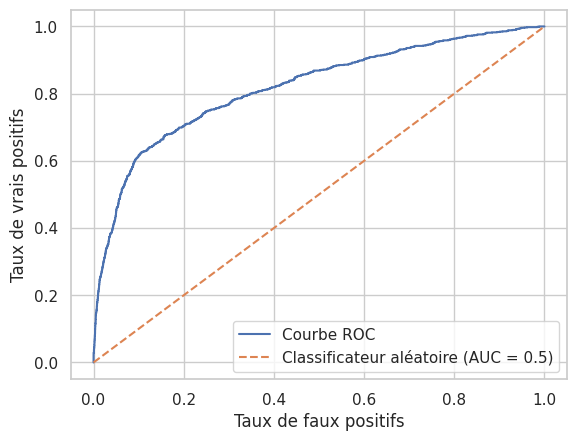

In [350]:
plot_roc_curve(stacking_model, preprocessor.transform(X_test), y_true_encoded)

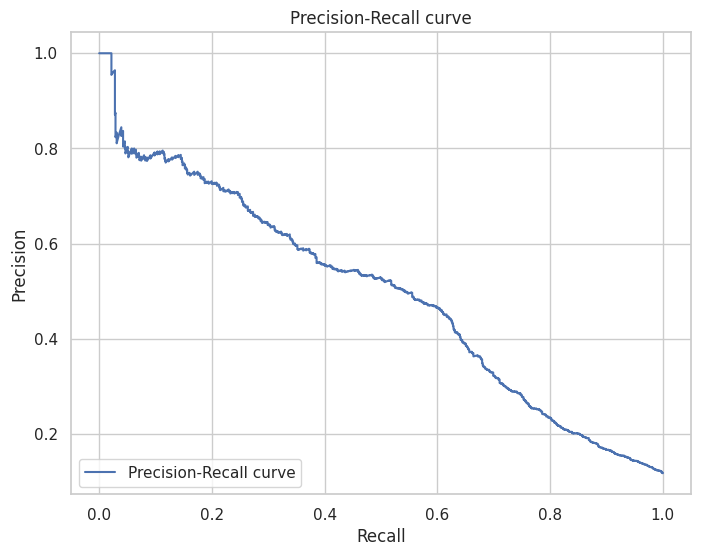

In [351]:
plot_precision_recall_curve(stacking_model, preprocessor.transform(X_test), y_true_encoded)

In [352]:
model_scores_df = add_model_scores(model_scores_df, 'Stacking Classification', metrics)

# Comparaison de modèles

In [353]:
model_scores_df

Accuracy  Precision    Recall  F1-score  \
Logistic Regression (simple)      0.833536   0.663240  0.753281  0.689352   
Logistic Regression (saga)        0.833536   0.663240  0.753281  0.689352   
Logistic Regression (l1 + saga)   0.823337   0.654235  0.748848  0.679162   
Logistic Regression (l2 + saga)   0.827465   0.658673  0.753428  0.684415   
Logistic Regression (elasticnet)  0.793711   0.636316  0.746409  0.655823   
Naive Bayes (GaussianNB)          0.847256   0.662683  0.712191  0.681442   
SVM (linéaire)                    0.821030   0.654016  0.752920  0.679037   
SVM (linéaire + l1)               0.820180   0.653142  0.751990  0.677979   
SVM (linéaire + l2)               0.821030   0.654016  0.752920  0.679037   
SVM (linéaire + elasticnet)       0.730087   0.609210  0.730986  0.607946   
SVM non linéaire (noyau optimal)  0.906629   0.849020  0.635551  0.681795   
kNN (simple)                      0.737737   0.605529  0.716492  0.607517   
kNN (optimal)                     0.919500   0.958207  0.657187  0.717374   
Arbre de décision                 0.653594   0.565034  0.647755  0.536091   
Arbre de décision (optimal)       0.899830   0.813812  0.613768  0.652816   
Forêt aléatoire                   0.781447   0.619694  0.716151  0.635082   
Forêt aléatoire (optimal)         0.896187   0.820046  0.585256  0.616052   
Gradient Boosting                 0.852113   0.680583  0.754840  0.706213   
Arbre de décision (Ada Boost)     0.850049   0.676347  0.747394  0.700993   
Forêt aléatoire (Ada Boost)       0.788368   0.630005  0.735762  0.647812   
Vote Classificateur               0.826129   0.654807  0.744602  0.679571   
Stacking Classification           0.788368   0.630005  0.735762  0.647812   

                                   ROC AUC  
Logistic Regression (simple)      0.811498  
Logistic Regression (saga)        0.811499  
Logistic Regression (l1 + saga)   0.812115  
Logistic Regression (l2 + saga)   0.811520  
Logistic Regression (elasticnet)  0.804977  
Naive Bayes (GaussianNB)          0.785869  
SVM (linéaire)                    0.811193  
SVM (linéaire + l1)               0.811346  
SVM (linéaire + l2)               0.811193  
SVM (linéaire + elasticnet)       0.775839  
SVM non linéaire (noyau optimal)  0.922594  
kNN (simple)                      0.767455  
kNN (optimal)                     0.968828  
Arbre de décision                 0.648336  
Arbre de décision (optimal)       0.767413  
Forêt aléatoire                   0.761796  
Forêt aléatoire (optimal)         0.808877  
Gradient Boosting                 0.818264  
Arbre de décision (Ada Boost)     0.806798  
Forêt aléatoire (Ada Boost)       0.790289  
Vote Classificateur               0.799009  
Stacking Classification           0.790289

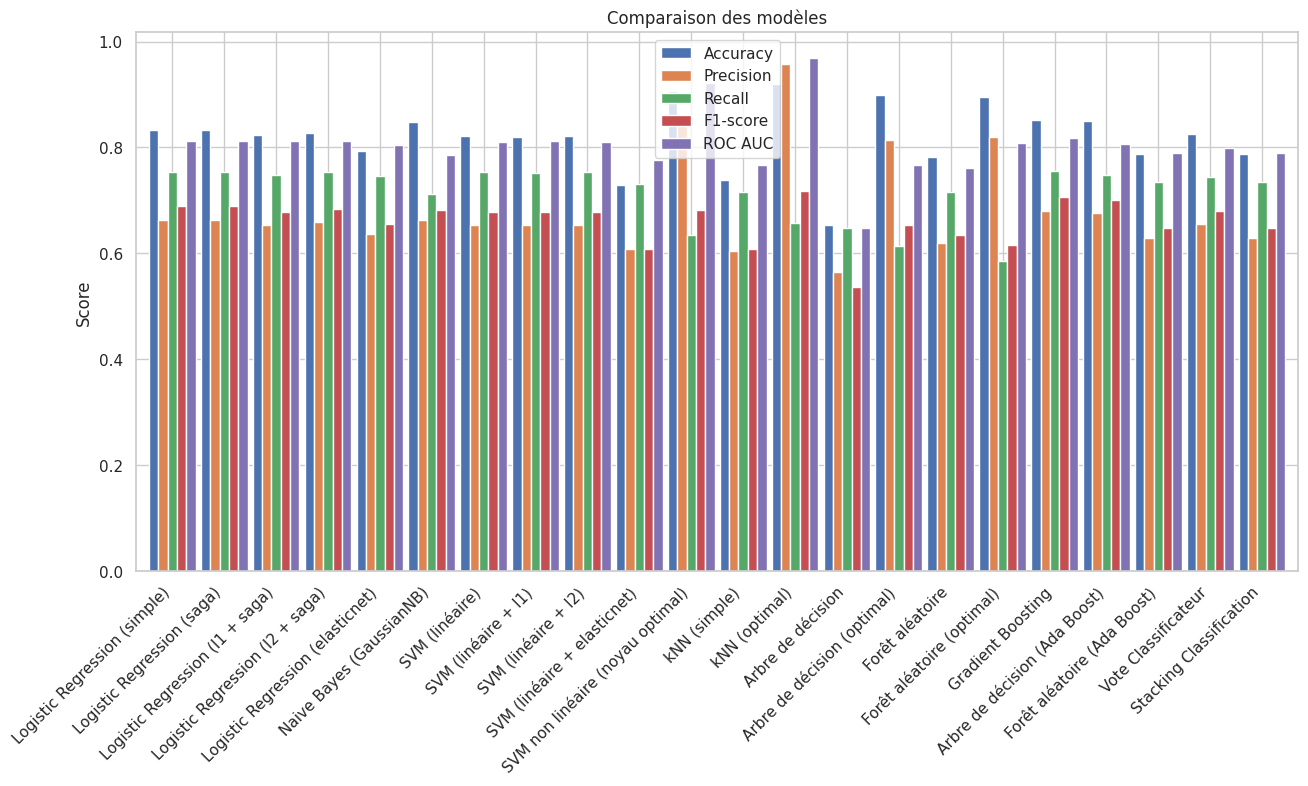

In [354]:
model_scores_df.plot(kind='bar', figsize=(15,7), width=0.9)
plt.title('Comparaison des modèles')
plt.ylabel('Score')
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()


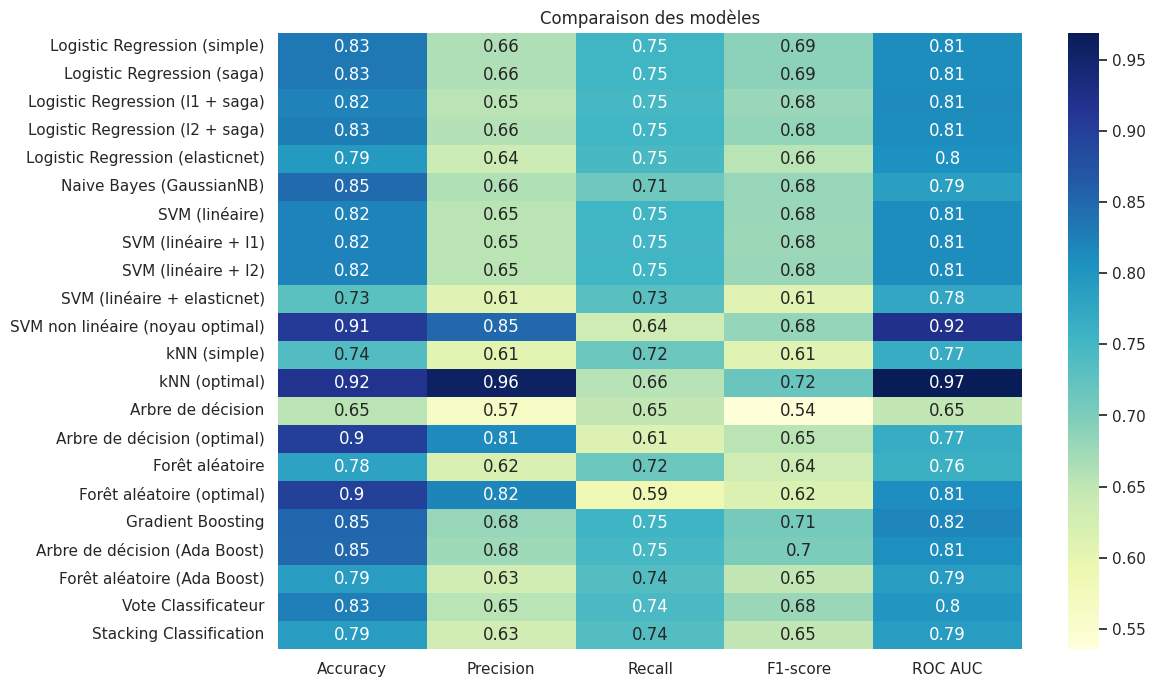

In [355]:
plt.figure(figsize=(12,8))
sns.heatmap(model_scores_df, annot=True, cmap="YlGnBu")
plt.title('Comparaison des modèles')
plt.show()

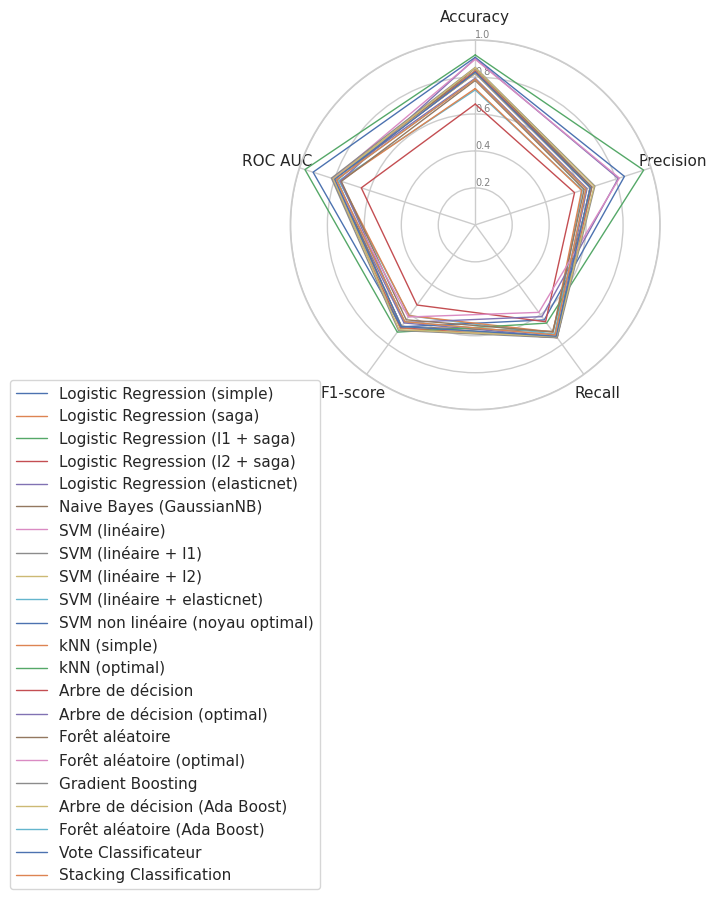

In [356]:
categories = list(model_scores_df)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8,1], ["0.2","0.4","0.6","0.8","1.0"], color="grey", size=7)
plt.ylim(0,1)

for i, row in model_scores_df.iterrows():
    values=row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=i)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

## Conclusion

Après avoir déroulé tout un ensemble d'algorithmes de classification, nous avons pu entrainer des modèles de toute sorte, en passant par une recherche d'hyperparamètres optimaux ou par l'intermédiaire de méthodes d'ensemble permettant de décupler les scores des métriques des modèles inhérents.

Toutefois, nous obtenons des scores quelque peu maigres voir acceptables pour le **F1-Score**, probablement à cause d'un problème de déséquilibre de classe (qui, à priori, devait être réglé grâce aux techniques d'échantillonnages à l'instar du *SMOTE* ou *RandomUnderSampling*). Le meilleur score du **F1-Score** obtenu jusque là n'est autre que 72%, ce qui demeure acceptable (dans une itération précédente nous avons obtenu 78% mais lors de la recompilation du meilleur modèle, le *GridSearch* n'a sûrement pas convergé vers les meilleurs hyperparamètres curieusement). Ce **F1-Score** s'exprimant en fonction de la **Precision** et le **Recall**, son résultat a été épaulé par un score de 96% de **Precision**.

Ceci étant dit, nous obtenons cela dit des scores en terme d'**AUC** et d'**Accuracy** très intéressants. Les score d'**AUC** et d'**Accuracy** les plus significatifs sont respectivement 97% et 92%.

La recherche des hyperparamètres les plus optimaux à l'aide du *GridSearch* a porté ses fruits. Bien que vorace en terme de ressources pour quelques algorithmes de classifications donnés, les modèles de classification non paramétriques comme le k-NN et le SVM non linéaire en ressortent comme étant les plus performants en terme de scores des métriques. Les algorithmes à base d'arbre comme les forêts aléatoires et les arbres de décisions s'en sortent bien comme prévu.

S'ensuit ensuite les méthodes d'ensemble qui arrivent à obtenir de bons résultats globalement notamment le *Gradient Boosting* et l'*AdaBoost* appliqué sur un "*weak learner*" à savoir l'algorithme d'arbre de décisions, faisant propulser ses scores médiocres en des scores plus qu'appréciables.